In [ ]:
"""
Created on Tue May  5 10:19:08 2020

@author: josephkarpinski
"""

https://www.sdss.org/dr16/irspec/targets/special-programs/

https://www.sdss.org/dr16/irspec/targets/

In [1]:
# %%
print("\nSection 001 ########################################################################\n")

from http.client import BAD_REQUEST
import sys

from scipy.fftpack import fft
print(sys.executable)


# set the path to the folder containing downloaded starcolorindexSpT.py file 
sys.path.insert(1,'/Users/test')

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

import scipy as sp

from scipy import *


import seaborn as sns 
#from mpl_toolkits import mplot3d
from scipy.stats import gaussian_kde

import starcolorindexSpT

import ipywidgets as widgets

#import ApogeeFunctionsNewCSV as ap

pd.set_option('display.max_rows', 2000)


print("\nInitialize!")


Section 001 ########################################################################

/Users/josephkarpinski/opt/anaconda3/bin/python

Initialize!


In [2]:
Ipython_default = plt.rcParams.copy()

# reset rcParams
#plt.rcParams.update(Ipython_default)

plt.style.use('dark_background')

print("Backup default plot background. \nSet Dark background.")

Backup default plot background. 
Set Dark background.


In [4]:
# Set the path to the downloaded Globular_Clusters.csv and read into the Python DatFrame df_Apogee
df_Apogee = pd.read_csv('/Users/test/Downloads/Globular_Clusters.csv')


# Sort and display data columns
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 2000)

df_Apogee .columns.sort_values().tolist()


['AK_TARG',
 'AK_TARG_METHOD',
 'AK_WISE',
 'ALPHA_M',
 'ALPHA_M_ERR',
 'ALT_ID',
 'AL_FE',
 'AL_FE_ERR',
 'AL_FE_FLAG',
 'ANDFLAG',
 'ANDFLAGS',
 'APOGEE2_TARGET1',
 'APOGEE2_TARGET2',
 'APOGEE2_TARGET3',
 'APOGEE_ID',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'APOGEE_TARGET3',
 'APSTAR_VERSION',
 'ASPCAPFLAG',
 'ASPCAPFLAGS',
 'ASPCAP_CHI2',
 'ASPCAP_CLASS',
 'ASPCAP_VERSION',
 'BP_RP',
 'CA_FE',
 'CA_FE_ERR',
 'CA_FE_FLAG',
 'CE_FE',
 'CE_FE_ERR',
 'CE_FE_FLAG',
 'CHI2_THRESHOLD',
 'CI_FE',
 'CI_FE_ERR',
 'CI_FE_FLAG',
 'COMBTYPE',
 'COMMISS',
 'CO_FE',
 'CO_FE_ERR',
 'CO_FE_FLAG',
 'CR_FE',
 'CR_FE_ERR',
 'CR_FE_FLAG',
 'CU_FE',
 'CU_FE_ERR',
 'CU_FE_FLAG',
 'C_FE',
 'C_FE_ERR',
 'C_FE_FLAG',
 'DDO51',
 'DDO51_ERR',
 'DEC',
 'ELEM_CHI2',
 'EXTRATARG',
 'FE_H',
 'FE_H_ERR',
 'FE_H_FLAG',
 'FIELD',
 'GAIA_PARALLAX',
 'GAIA_PARALLAX_ERROR',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'GAIA_PMDEC',
 'GAIA_PMDEC_ERROR',
 'GAIA_PMRA',
 'GAIA_PMRA_ERROR',
 '

In [5]:
# Use BP_RP value to group stars into classes

df_class_O = df_Apogee[(df_Apogee['SpT2'] >= "O0V") & (df_Apogee['SpT2'] <= "O9V")]
df_class_B = df_Apogee[(df_Apogee['SpT2'] >= "B0V") & (df_Apogee['SpT2'] <= "B9V")]
df_class_A = df_Apogee[(df_Apogee['SpT2'] >= "A0V") & (df_Apogee['SpT2'] <= "A9V")]
df_class_F = df_Apogee[(df_Apogee['SpT2'] >= "F0V") & (df_Apogee['SpT2'] <= "F9V")]
df_class_G = df_Apogee[(df_Apogee['SpT2'] >= "G0V") & (df_Apogee['SpT2'] <= "G9V")]
df_class_K = df_Apogee[(df_Apogee['SpT2'] >= "K0V") & (df_Apogee['SpT2'] <= "K9V")]
df_class_M = df_Apogee[(df_Apogee['SpT2'] >= "M0V") & (df_Apogee['SpT2'] <= "M9V")]
df_class_L = df_Apogee[(df_Apogee['SpT2'] >= "L0V") & (df_Apogee['SpT2'] <= "L9V")]
df_class_T = df_Apogee[(df_Apogee['SpT2'] >= "T0V") & (df_Apogee['SpT2'] <= "T9V")]

print("\nClass O: " + str(df_class_O.shape[0]))
print("Class B: " + str(df_class_B.shape[0]))
print("Class A: " + str(df_class_A.shape[0]))
print("Class F: " + str(df_class_F.shape[0]))
print("Class G: " + str(df_class_G.shape[0]))
print("Class K: " + str(df_class_K.shape[0]))
print("Class M: " + str(df_class_M.shape[0]))
print("Class L: " + str(df_class_L.shape[0]))
print("Class T: " + str(df_class_T.shape[0]))

s1 = df_Apogee

Fd1 = s1[s1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
GKd1 = s1[s1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
GKg1 = s1[s1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
Md1 = s1[s1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
Mg1 = s1[s1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]

print("\nFd: " + str(Fd1.shape[0]))
print("GKd: " + str(GKd1.shape[0]))
print("GKg: " + str(GKg1.shape[0]))
print("Md: " + str(Md1.shape[0]))
print("Mg: " + str(Mg1.shape[0]))


idx_BA  = sp.where( (s1['ASPCAP_CLASS'] == 'BA') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Fd_a = sp.where( (s1['ASPCAP_CLASS'] == 'Fd_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_b = sp.where( (s1['ASPCAP_CLASS'] == 'Fd_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_c = sp.where( (s1['ASPCAP_CLASS'] == 'Fd_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Fd_d = sp.where( (s1['ASPCAP_CLASS'] == 'Fd_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_GKd_a = sp.where( (s1['ASPCAP_CLASS'] == 'GKd_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_b = sp.where( (s1['ASPCAP_CLASS'] == 'GKd_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_c = sp.where( (s1['ASPCAP_CLASS'] == 'GKd_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKd_d = sp. where( (s1['ASPCAP_CLASS'] == 'GKd_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_GKg_a = sp.where( (s1['ASPCAP_CLASS'] == 'GKg_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_b = sp.where( (s1['ASPCAP_CLASS'] == 'GKg_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_c = sp.where( (s1['ASPCAP_CLASS'] == 'GKg_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_GKg_d = sp.where( (s1['ASPCAP_CLASS'] == 'GKg_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Md_b = sp.where( (s1['ASPCAP_CLASS'] == 'Md_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_c = sp.where( (s1['ASPCAP_CLASS'] == 'Md_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_d = sp.where( (s1['ASPCAP_CLASS'] == 'Md_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Md_a = sp.where( (s1['ASPCAP_CLASS'] == 'Md_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

idx_Mg_a = sp.where( (s1['ASPCAP_CLASS'] == 'Mg_a') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_b = sp.where( (s1['ASPCAP_CLASS'] == 'Mg_b') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_c = sp.where( (s1['ASPCAP_CLASS'] == 'Mg_c') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]
idx_Mg_d = sp.where( (s1['ASPCAP_CLASS'] == 'Mg_d') & sp.logical_not (s1['APOGEE_TARGET2'] & 2**9))[0]

s1Label = "All"

print('\n' + s1Label + ': Stars '   + str(s1.shape[0]))

print('\nBA' + ': Stars '   + str(idx_BA.shape[0]))

print('\nFd_a' + ': Stars '   + str(idx_Fd_a.shape[0]))
print('Fd_b' + ': Stars '     + str(idx_Fd_b.shape[0]))
print('Fd_c' + ': Stars '     + str(idx_Fd_c.shape[0]))
print('Fd_d' + ': Stars '     + str(idx_Fd_d.shape[0]))


print('\nGKd_a' + ': Stars '   + str(idx_GKd_a.shape[0]))
print('GKd_b' + ': Stars '     + str(idx_GKd_b.shape[0]))
print('GKd_c' + ': Stars '     + str(idx_GKd_c.shape[0]))
print('GKd_d' + ': Stars '     + str(idx_GKd_d.shape[0]))


print('\nGKg_a' + ': Stars '   + str(idx_GKg_a.shape[0]))
print('GKg_b' + ': Stars '     + str(idx_GKg_b.shape[0]))
print('GKg_c' + ': Stars '     + str(idx_GKg_c.shape[0]))
print('GKg_d' + ': Stars '     + str(idx_GKg_d.shape[0]))


print('\nMd_a' + ': Stars '   + str(idx_Md_a.shape[0]))
print('Md_b' + ': Stars '     + str(idx_Md_b.shape[0]))
print('Md_c' + ': Stars '     + str(idx_Md_c.shape[0]))
print('Md_d' + ': Stars '     + str(idx_Md_d.shape[0]))


print('\nMg_a' + ': Stars '   + str(idx_Mg_a.shape[0]))
print('Mg_b' + ': Stars '     + str(idx_Mg_b.shape[0]))
print('Mg_c' + ': Stars '     + str(idx_Mg_c.shape[0]))
print('Mg_d' + ': Stars '     + str(idx_Mg_d.shape[0]))


Class O: 1
Class B: 6
Class A: 118
Class F: 433
Class G: 684
Class K: 6838
Class M: 648
Class L: 1
Class T: 0

Fd: 725
GKd: 1918
GKg: 5786
Md: 335
Mg: 649

All: Stars 9700

BA: Stars 62

Fd_a: Stars 238
Fd_b: Stars 171
Fd_c: Stars 173
Fd_d: Stars 71

GKd_a: Stars 663
GKd_b: Stars 525
GKd_c: Stars 555
GKd_d: Stars 175

GKg_a: Stars 2306
GKg_b: Stars 1519
GKg_c: Stars 1464
GKg_d: Stars 497

Md_a: Stars 123
Md_b: Stars 99
Md_c: Stars 90
Md_d: Stars 23

Mg_a: Stars 252
Mg_b: Stars 148
Mg_c: Stars 181
Mg_d: Stars 68


In [6]:
# Unique Star Fields: 1366 in Apogee DR16

# Unique Sample Star Fields
unique_fields = sp.unique(df_Apogee['FIELD'])

print("\nSample Fields: " + str(unique_fields.shape[0]))

# Group 1366 Star Fields in Full Apogee DR16 data file
unique_fields01 =  unique_fields[0:250]
unique_fields02 =  unique_fields[250:500]
unique_fields03 =  unique_fields[500:750]
unique_fields04 =  unique_fields[750:1000]
unique_fields05 =  unique_fields[1000:1150]
unique_fields06 =  unique_fields[1150:1367]

unique_fields00 =  unique_fields[0:5]



Sample Fields: 17


In [7]:
# Print unique fields in sample file
print(unique_fields)

['47TUC' 'M10' 'M12-N' 'M12-S' 'M15' 'M4' 'M5PAL5' 'M68' 'M71' 'M79'
 'N1851' 'N2808' 'N288' 'N3201' 'N362' 'N6441' 'Omegacen']


In [8]:
# Group unique star fields in targets of various size 

Globular_Clusters = [
'47TUC',     # 372 Stars   Age: 13.06 Gyr    FeH: -0.78
'M4',        # 334 Stars
'M5PAL5',    # 718 Stars   Age: 10.62 Gyr    FeH: -1.12
'M10',       # 475 Stars
'M12-N',     # 308 Stars   Age: 12.67 Gyr    FeH: -1.14
'M12-S',     # 462 Stars
'M15',       # 1189 Stars  Age: 12.00 Gyr    FeH: -2.37
'M68',       # 362 Stars
'M71',       # 1028 Stars  Age: 9-10  Gyr    FeH: -0.78
'M79' ,      # 373 Stars
'N288',      # 375 Stars   Age: 10.62 Gyr    FeH: -1.14
'N362',      # 270 Stars   Age: 10.37 Gyr    FeH: -1.09
'N1851',     # 382 Stars   Age: 9.2   Gyr    FeH: -1.27
'N2808' ,    # 365 Stars
'N3201',     # 355 Stars
'N6441',     # 208 Stars   Age: 13-13.7 Gyr  FeH: -0.53
'Omegacen',  # 1201 Stars  Age: 11.52 Gyr    FeH: -1.35
]

Globular_Clusters1 = [
'47TUC',     # 372 Stars   Age: 13.06 Gyr    FeH: -0.78
]

Globular_Clusters2 = [
'M4',        # 334 Stars
'M5PAL5',    # 718 Stars   Age: 10.62 Gyr    FeH: -1.12
]

Globular_Clusters3 = [
'M10',       # 475 Stars
'M12-N',     # 308 Stars   Age: 12.67 Gyr    FeH: -1.14
'M12-S',     # 462 Stars
]

Globular_Clusters4 = [
'M15',       # 1189 Stars  Age: 12.00 Gyr    FeH: -2.37
'M68',       # 362 Stars
'M71',       # 1028 Stars  Age: 9-10  Gyr    FeH: -0.78
'M79' ,      # 373 Stars
]

Globular_Clusters5 = [
'N288',      # 375 Stars   Age: 10.62 Gyr    FeH: -1.14
'N362',      # 270 Stars   Age: 10.37 Gyr    FeH: -1.09
'N1851',     # 382 Stars   Age: 9.2   Gyr    FeH: -1.27
'N2808' ,    # 365 Stars
'N3201',     # 355 Stars
]

Globular_Clusters6 = [
'N6441',     # 208 Stars   Age: 13-13.7 Gyr  FeH: -0.53
'Omegacen',  # 1201 Stars  Age: 11.52 Gyr    FeH: -1.35
]


In [9]:
# Select a Globular_Cluster sample field by comment/uncomment target

#fields = Globular_Clusters
#fields = Globular_Clusters1
#fields = Globular_Clusters2
#fields = Globular_Clusters3
#fields = Globular_Clusters4
fields = Globular_Clusters5
#fields = Globular_Clusters6

print("\nSubset of Fields: " + str(len(fields)))
print(fields)
print("\n")



Subset of Fields: 5
['N288', 'N362', 'N1851', 'N2808', 'N3201']




In [10]:
# Choose which plots to show

Plot_001_flag = "Y"      # HR_Diagram Mapping BP_RP to Absolute Magnitude
Plot_002_flag = "Y"      # HR_Diagram_Mapping BP_RP to Absolute Magnitude by Star Class
Plot_003_flag = "Y"      # HR Diagram Mapping BP-RP to Absolute Magnitude by LogG

Plot_004_flag = "N"      # HR Diagram Mapping BP-RP to GAIA_PHOT_G_MEAN_MAG by Star Class

Plot_005_flag = "Y"      # HR_Diagram_Mapping Teff  to LogG by Star Class
Plot_006_flag = "Y"      # HR_Diagram_Mapping Teff  to LogG by Total Metal Content [M/H]

Plot_007_flag = "N"      # HR_Diagram_Mapping Teff  to LogG by Alpha Element Abundance [ALPHA_M]
Plot_008_flag = "N"      # HR_Diagram_Mapping Teff  to LogG by SFD Reddening [SFD_EBV]
Plot_009_flag = "N"      # HR_Diagram_Mapping Teff  to LogG by Gaia Color [BP_RP]

Plot_010_flag = "Y"      # Plot Average Radial Velocity [VHELIO_AVG] By RA/Dec or GLON/GLAT
Plot_011_flag = "N"      # Plot GAIA_RADIAL_VELOCITY By RA/Dec or GLON/GLAT

Plot_012_flag = "Y"      # Plot LogG By RA/Dec or GLON/GLAT
Plot_013_flag = "N"      # Plot LogG Heatmap values to APOGEE_ID by Star Class

Plot_014_flag = "Y"      # Plot FeH By RA/Dec or GLON/GLAT
Plot_015_flag = "N"      # Plot FeH Heatmap values to APOGEE_ID by Star Class

print("\n Flags Set")


 Flags Set



N288

ProgramName: ['cluster_gc']

main_sequence: 273
turnoff: 18
subgiants: 9
red_giants: 81
red_clump: 9
red_giants - red_clump: 72
dwarfs: 297

BA: 0
Fd: 33
GKd: 204
GKg: 86
Md: 54
Mg: 2


Plot 001 ####################### HR Diagram 



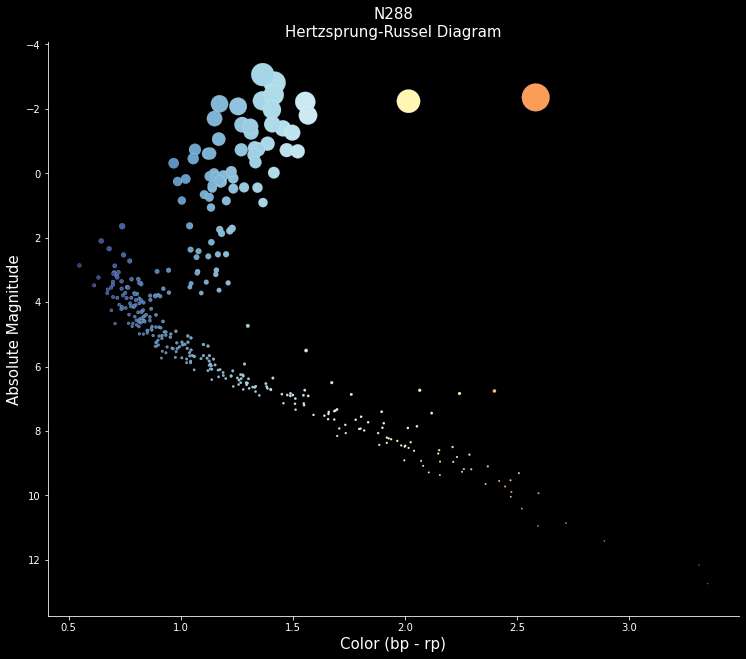


Plot 002 ####################### HR Diagram Mapping BP-RP 



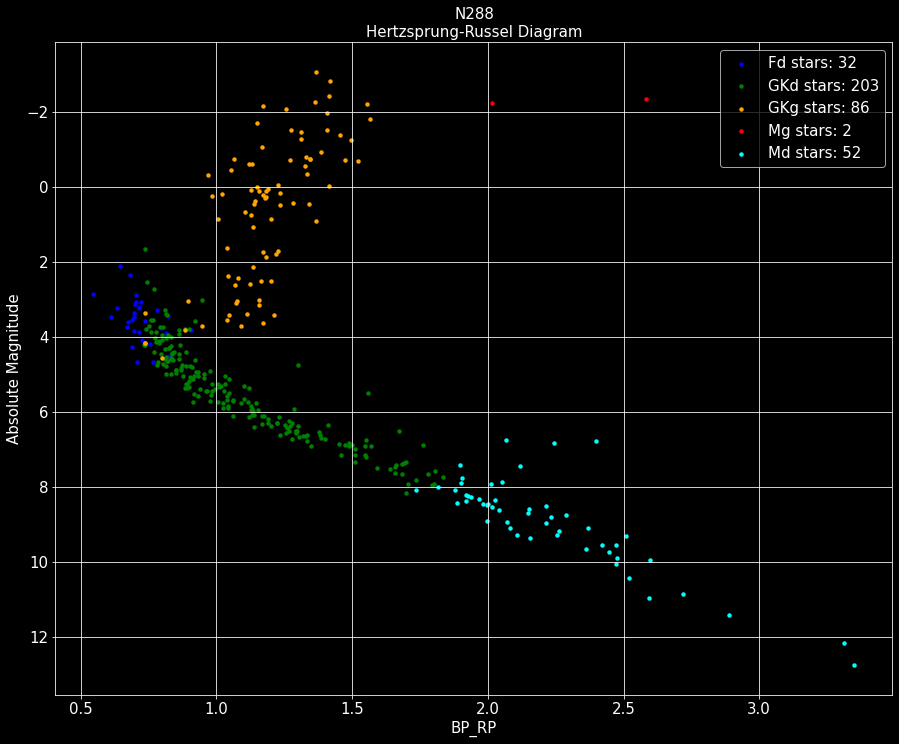


Plot 003 ####################### HR Diagram Mapping BP-RP 



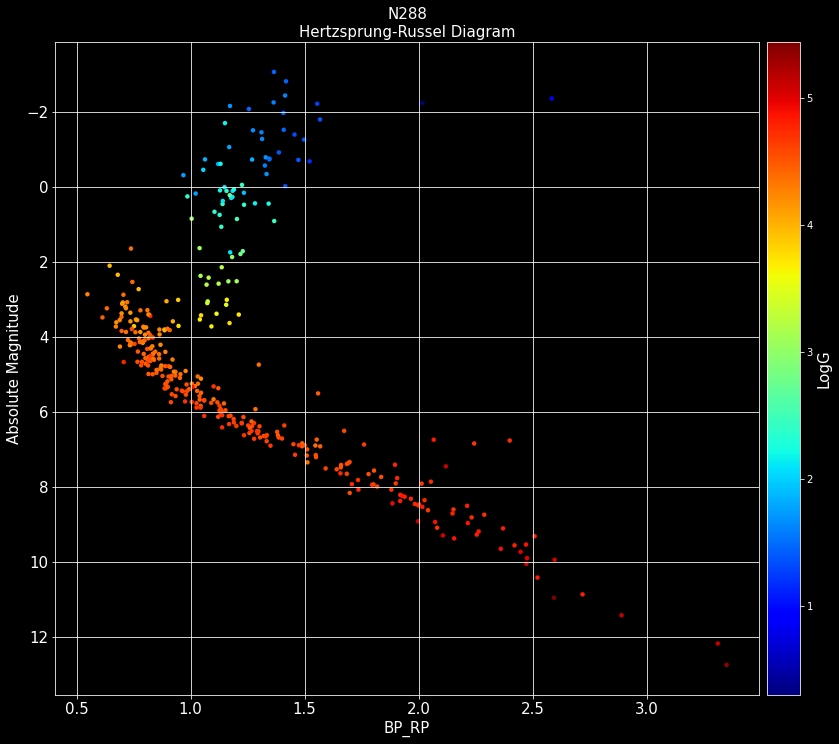


Plot 004 ####################### HR Diagram Mapping Star Class 


Plot 005 ####################### HR Diagram Mapping Star Class 



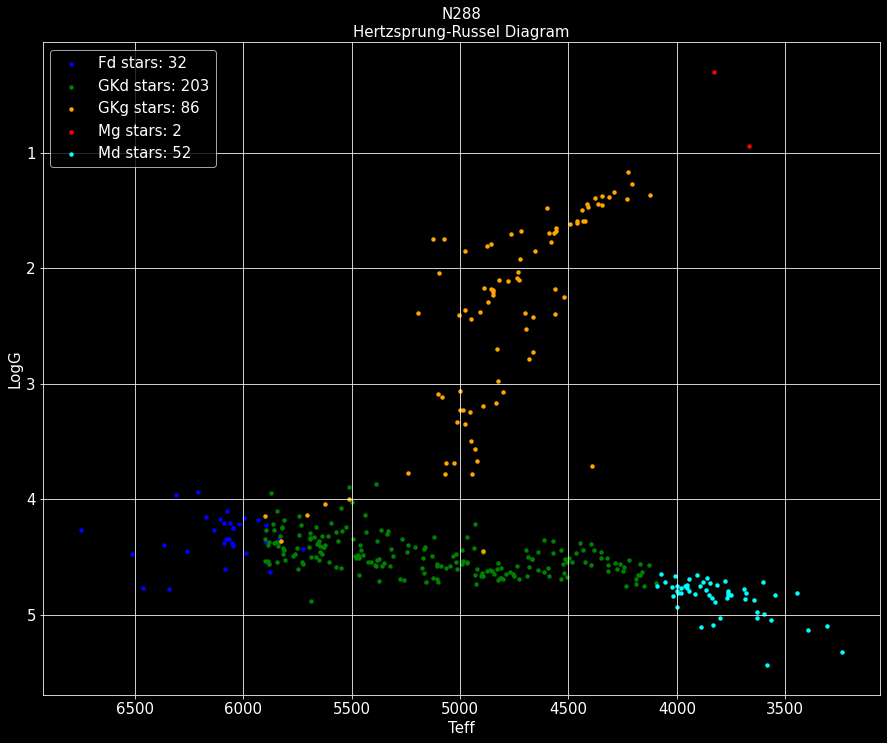


Plot 006 ####################### HR Diagram Mapping Metal Content 



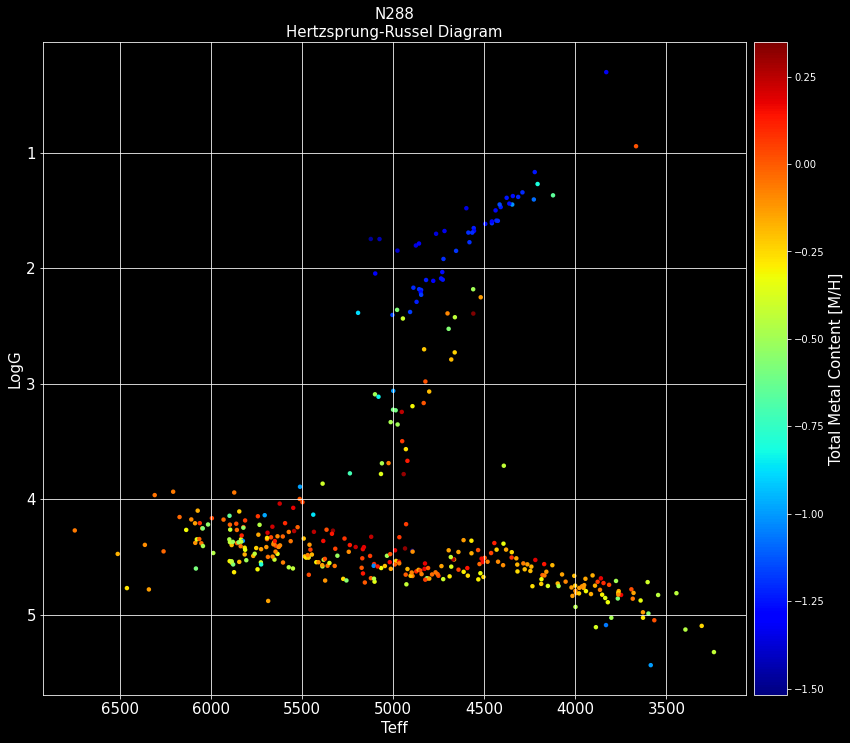


Plot 007 ####################### HR Diagram Mapping Alpha-Element Abundance 


Plot 008 ####################### HR Diagram Mapping SFD reddening 


Plot 009 ####################### HR Diagram Mapping BP-RP 


Plot 010 ####################### VHELIO_AVG 



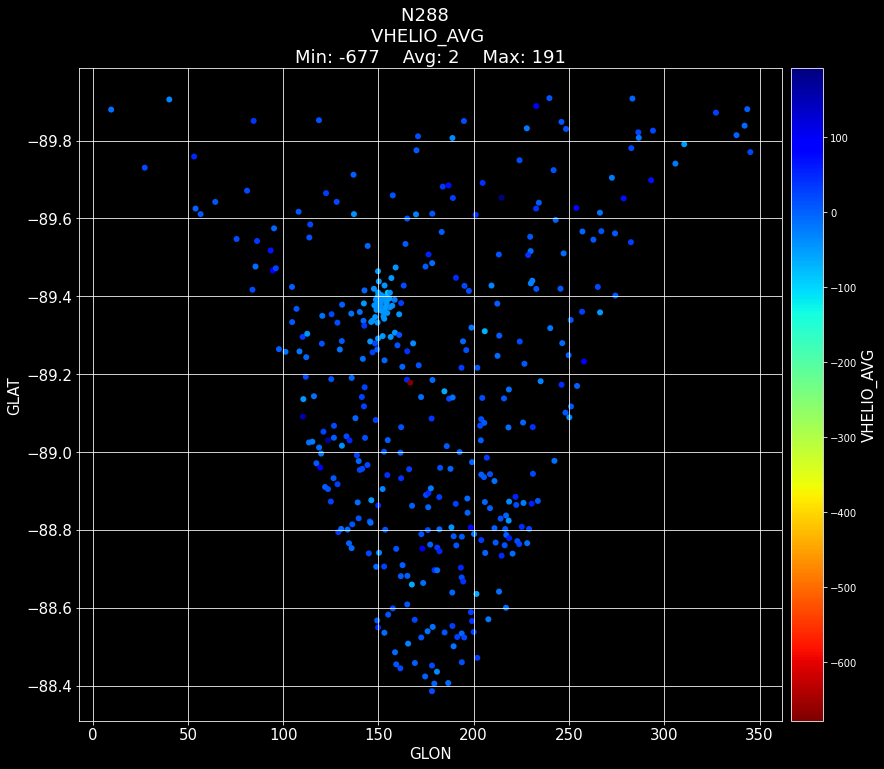


Plot 011 ####################### Gaia Radial Velocity 


Plot 012 ####################### LogG 



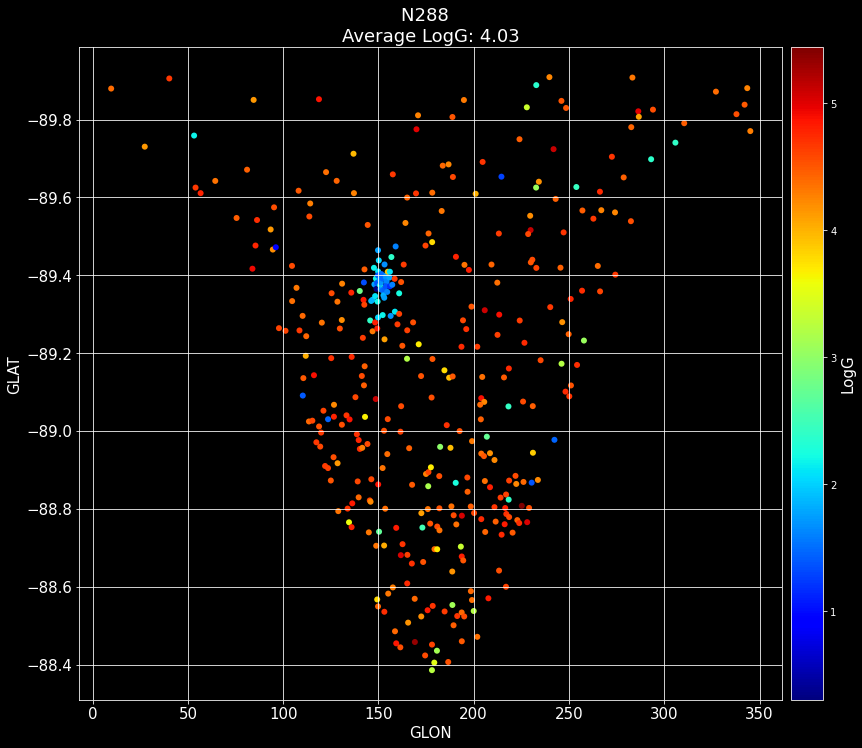


Plot 013 ####################### LogG Heatmap 


Plot 014 ####################### FeH 



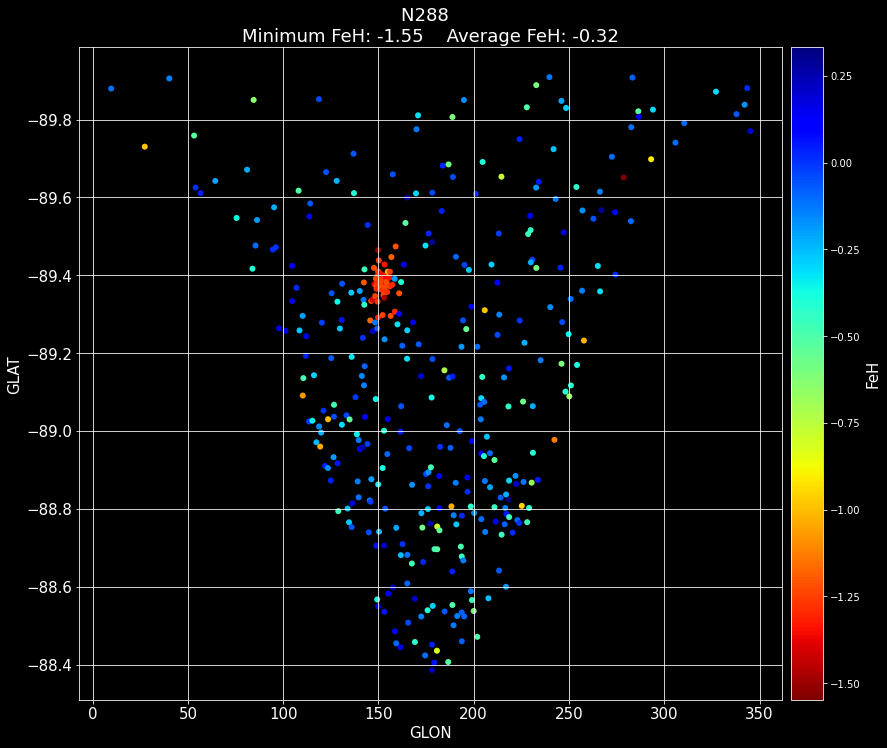


Plot 015 ####################### FeH Heatmap 


N362

ProgramName: ['cluster_gc']

main_sequence: 36
turnoff: 7
subgiants: 0
red_giants: 269
red_clump: 6
red_giants - red_clump: 263
dwarfs: 43

BA: 2
Fd: 24
GKd: 30
GKg: 107
Md: 2
Mg: 144


Plot 001 ####################### HR Diagram 



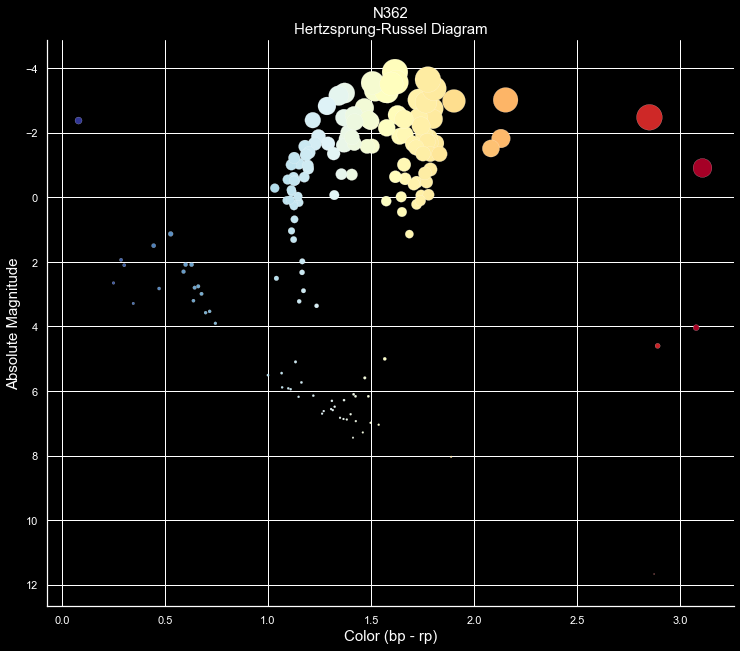


Plot 002 ####################### HR Diagram Mapping BP-RP 



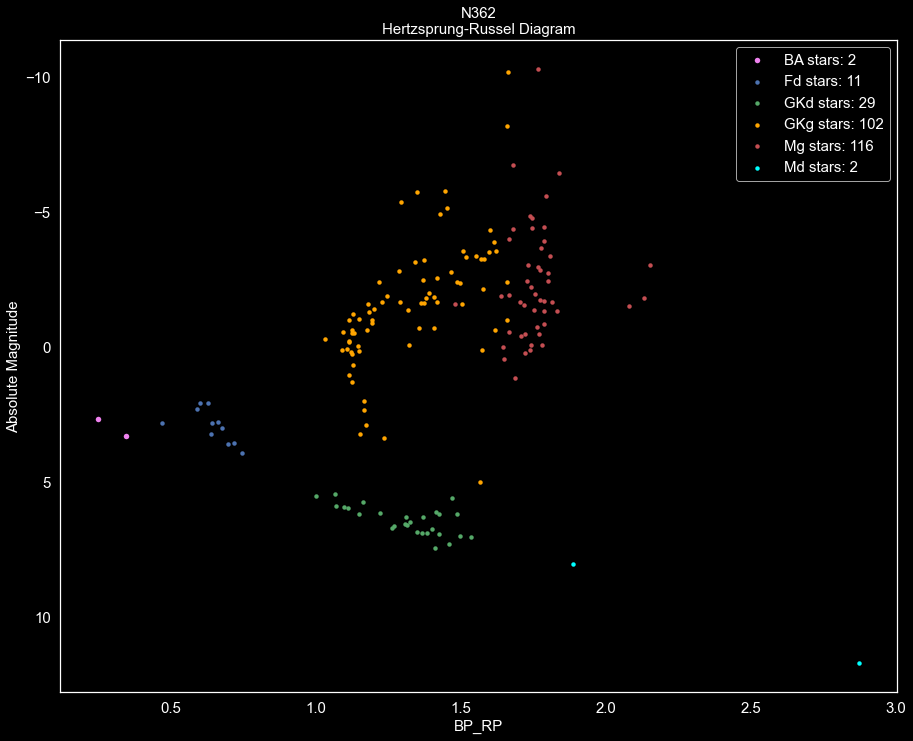


Plot 003 ####################### HR Diagram Mapping BP-RP 



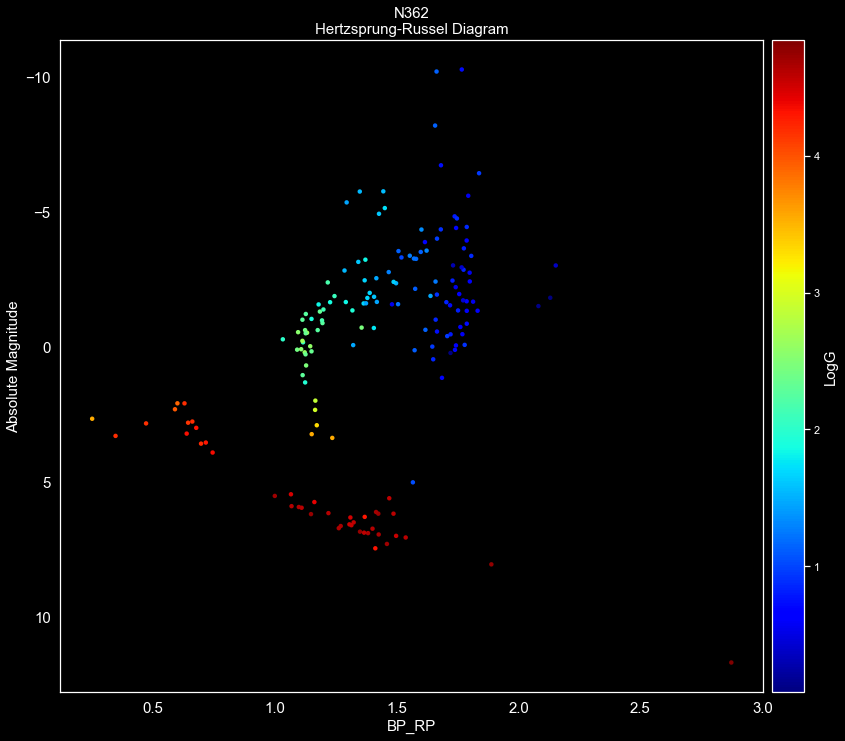


Plot 004 ####################### HR Diagram Mapping Star Class 


Plot 005 ####################### HR Diagram Mapping Star Class 



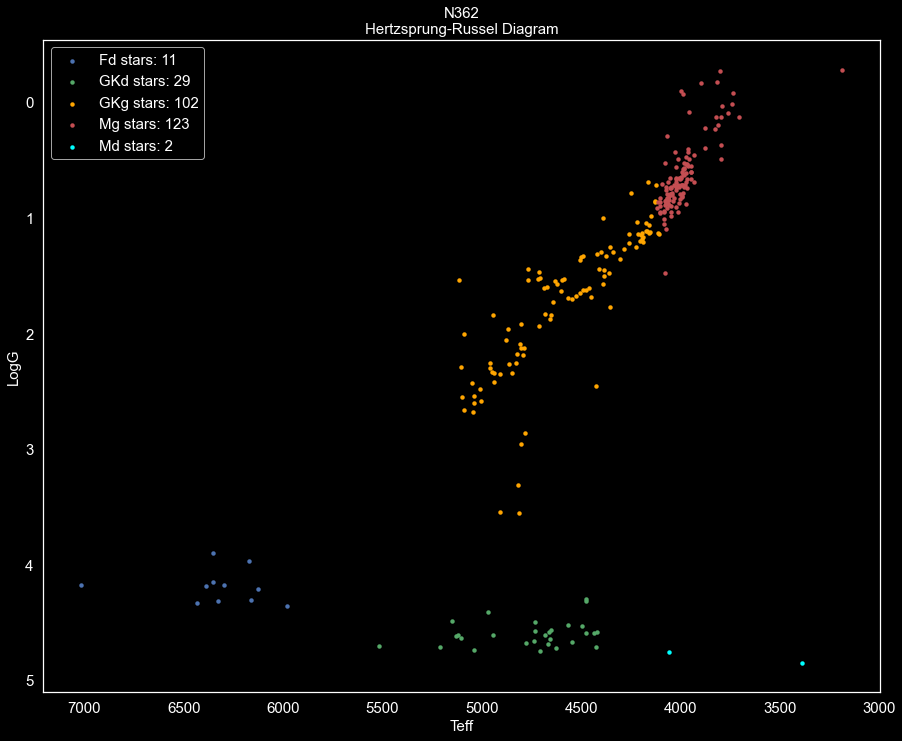


Plot 006 ####################### HR Diagram Mapping Metal Content 



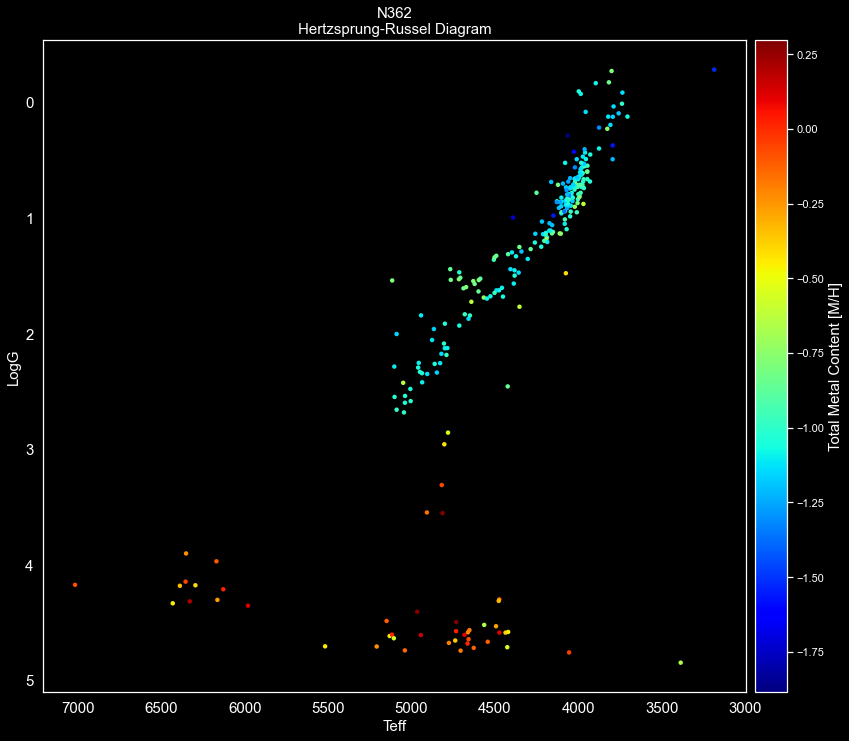


Plot 007 ####################### HR Diagram Mapping Alpha-Element Abundance 


Plot 008 ####################### HR Diagram Mapping SFD reddening 


Plot 009 ####################### HR Diagram Mapping BP-RP 


Plot 010 ####################### VHELIO_AVG 



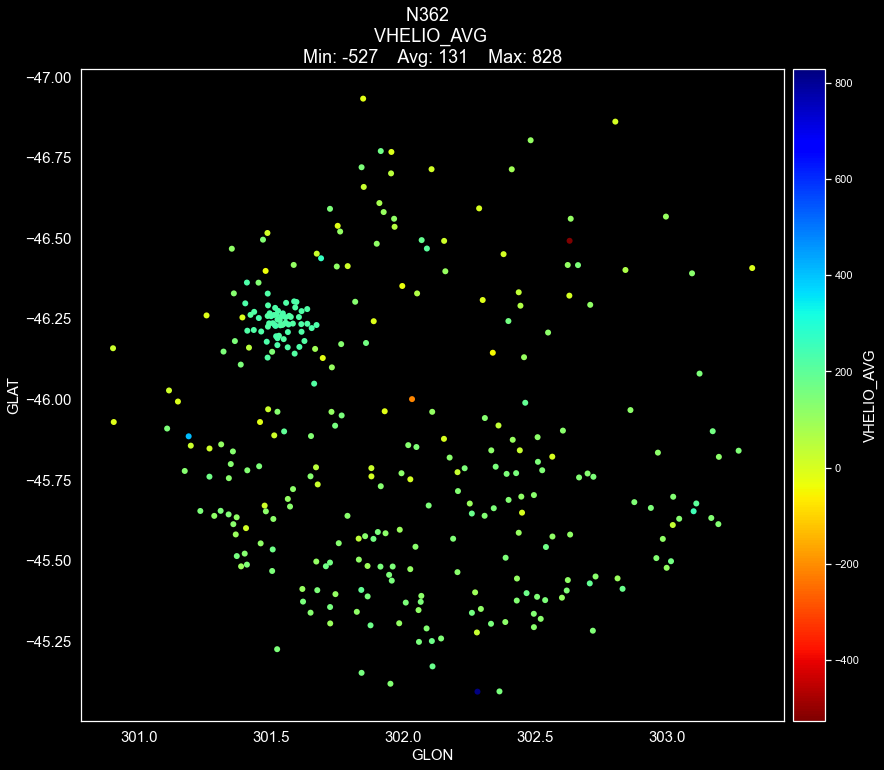


Plot 011 ####################### Gaia Radial Velocity 


Plot 012 ####################### LogG 



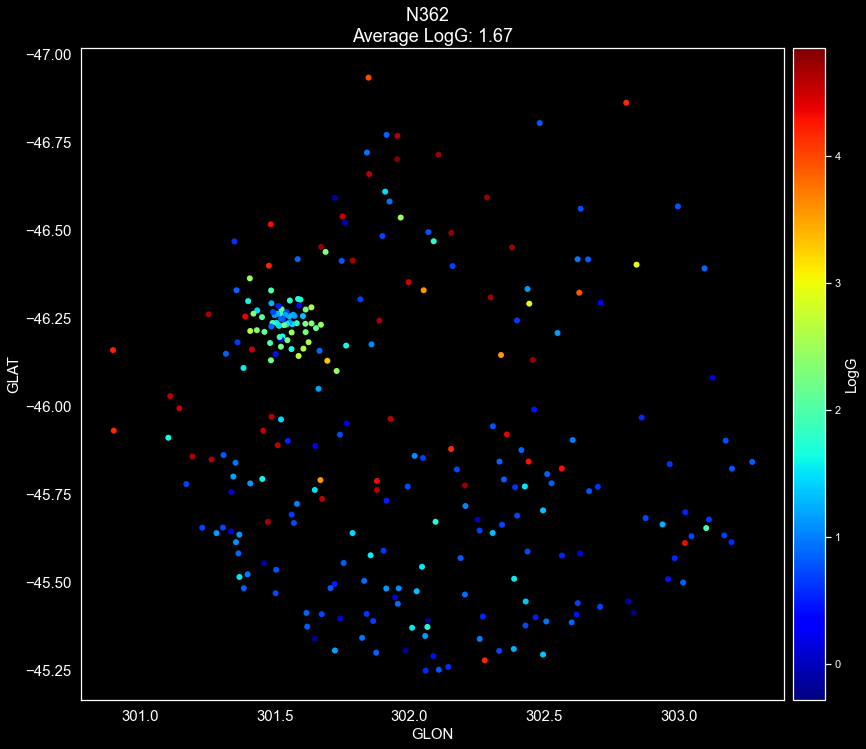


Plot 013 ####################### LogG Heatmap 


Plot 014 ####################### FeH 



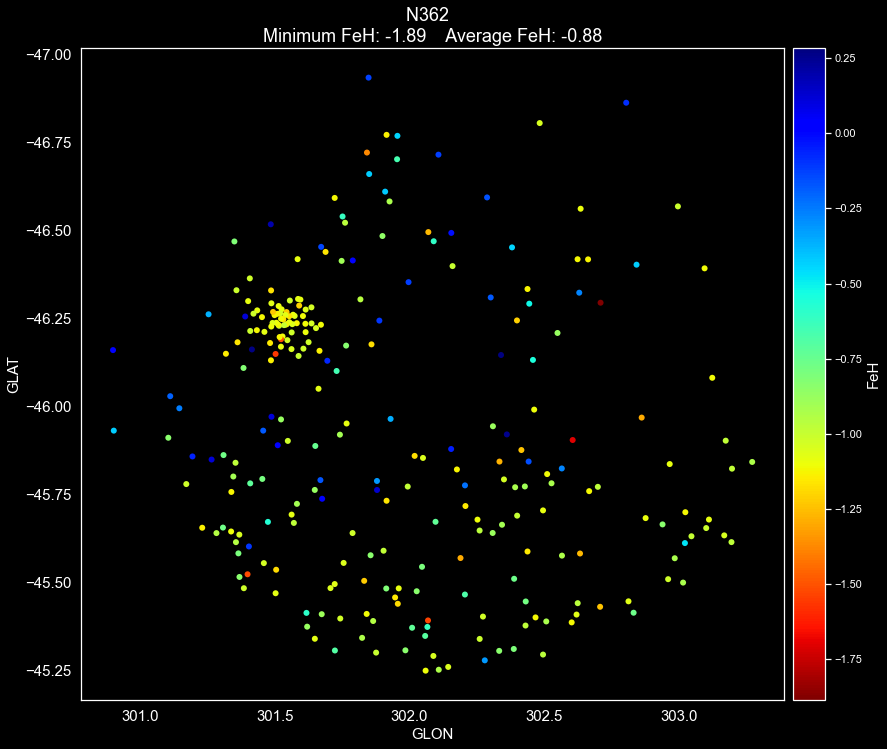


Plot 015 ####################### FeH Heatmap 


N1851

ProgramName: ['cluster_gc' 'cluster_gc1']

main_sequence: 206
turnoff: 46
subgiants: 14
red_giants: 263
red_clump: 14
red_giants - red_clump: 249
dwarfs: 260

BA: 1
Fd: 85
GKd: 197
GKg: 155
Md: 41
Mg: 12


Plot 001 ####################### HR Diagram 



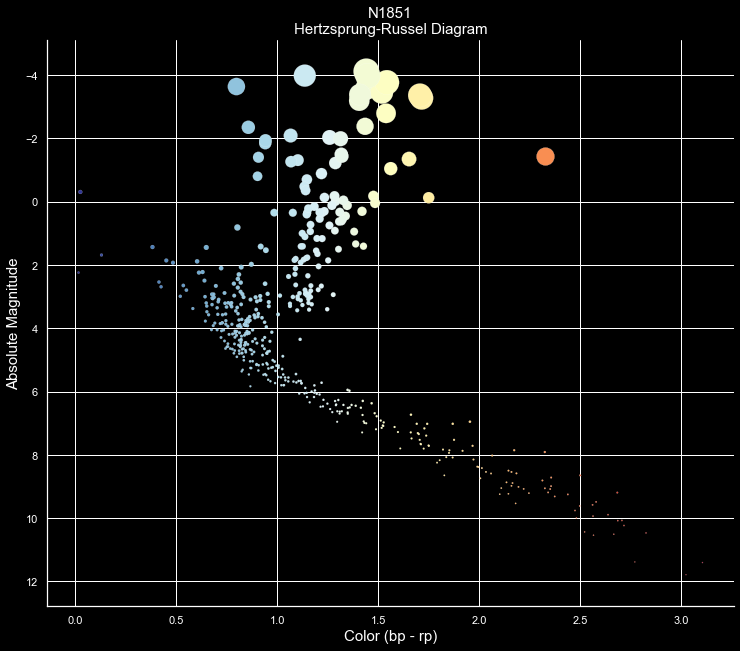


Plot 002 ####################### HR Diagram Mapping BP-RP 



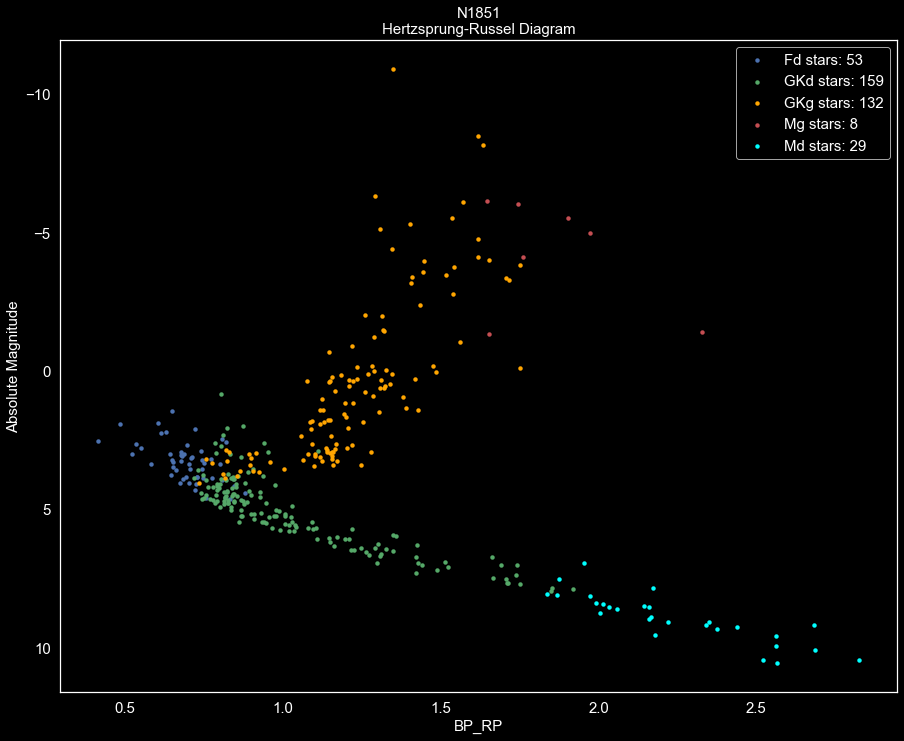


Plot 003 ####################### HR Diagram Mapping BP-RP 



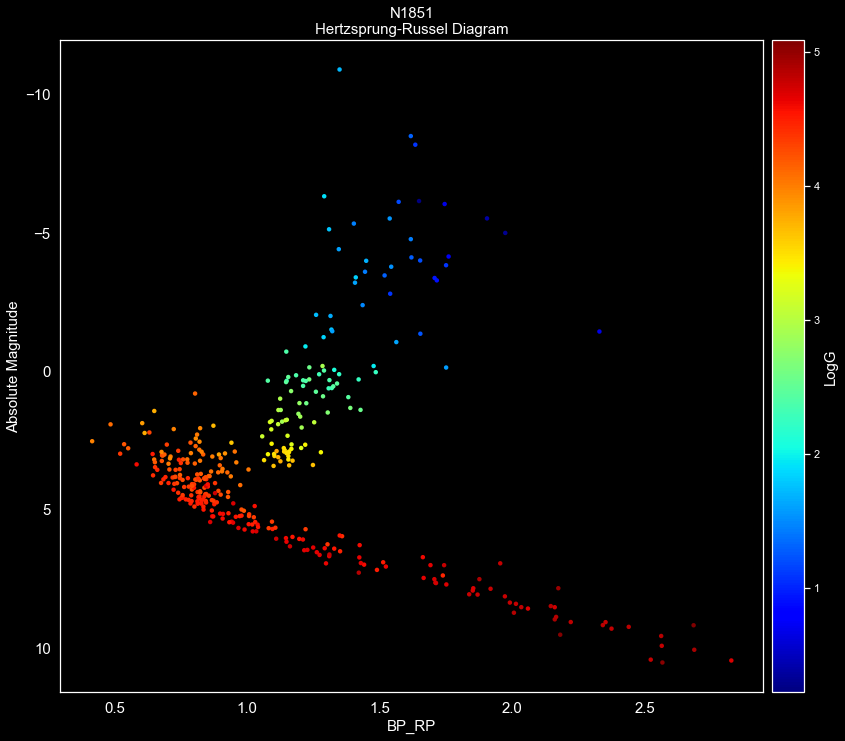


Plot 004 ####################### HR Diagram Mapping Star Class 


Plot 005 ####################### HR Diagram Mapping Star Class 



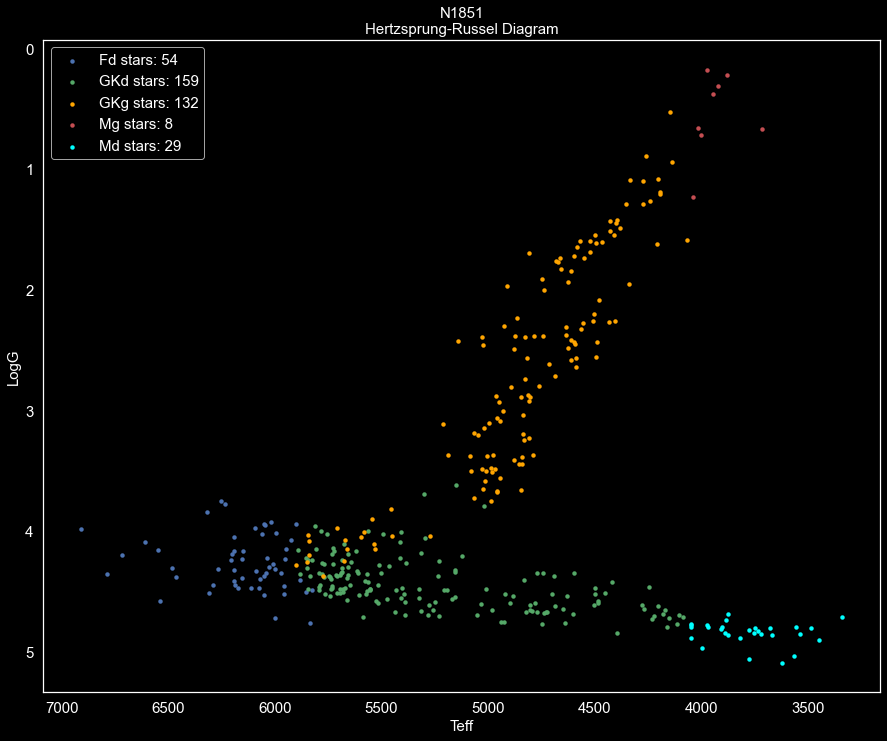


Plot 006 ####################### HR Diagram Mapping Metal Content 



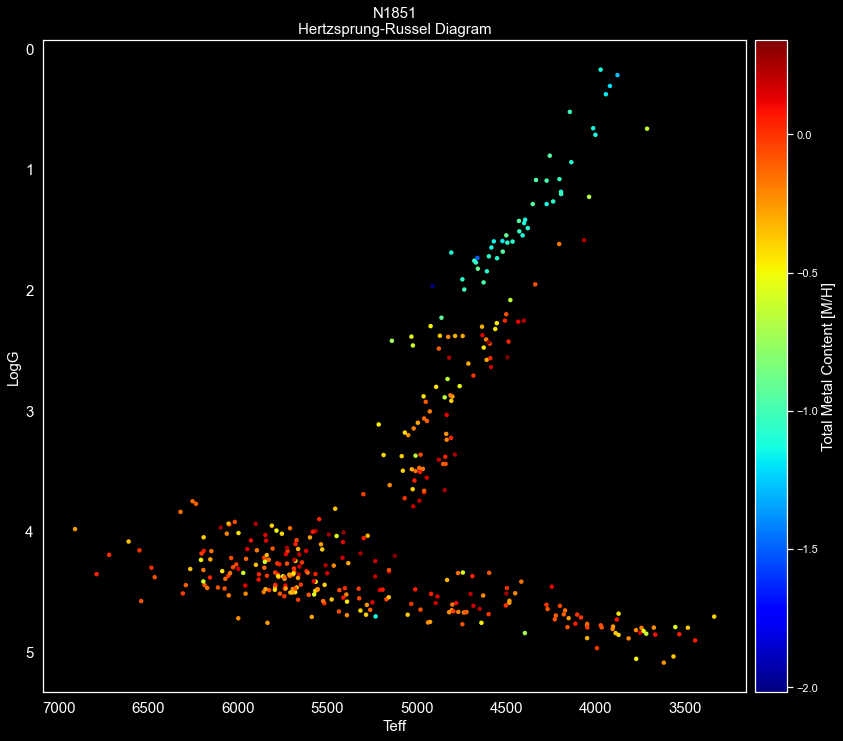


Plot 007 ####################### HR Diagram Mapping Alpha-Element Abundance 


Plot 008 ####################### HR Diagram Mapping SFD reddening 


Plot 009 ####################### HR Diagram Mapping BP-RP 


Plot 010 ####################### VHELIO_AVG 



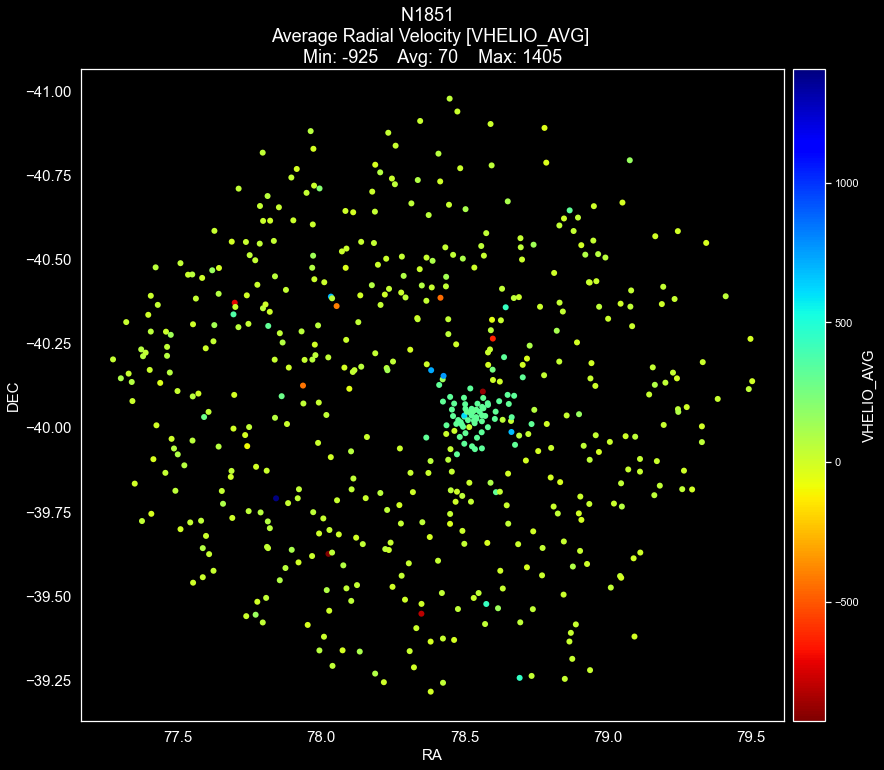


Plot 011 ####################### Gaia Radial Velocity 


Plot 012 ####################### LogG 



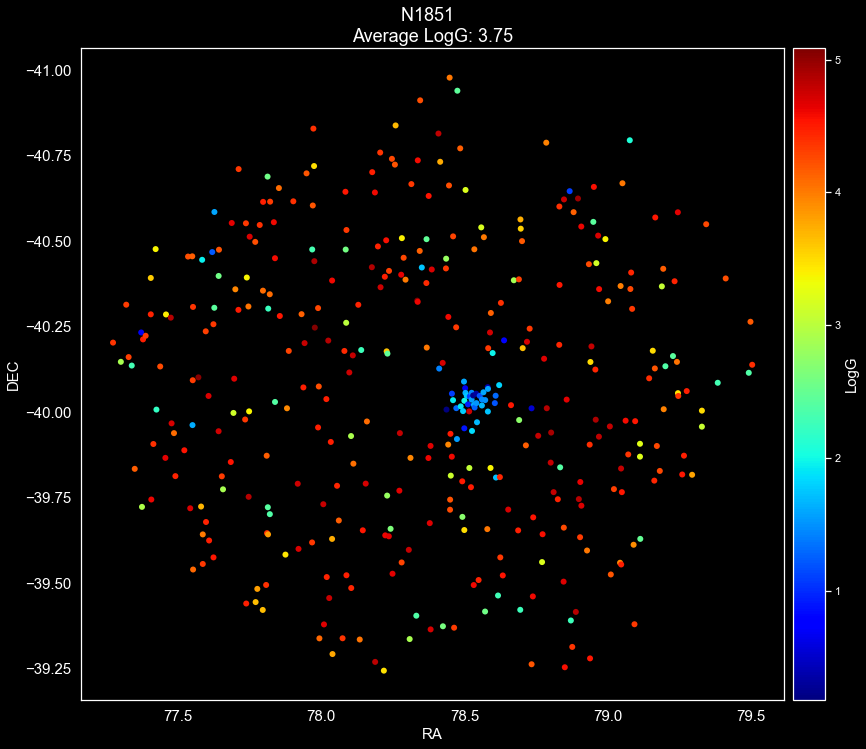


Plot 013 ####################### LogG Heatmap 


Plot 014 ####################### FeH 



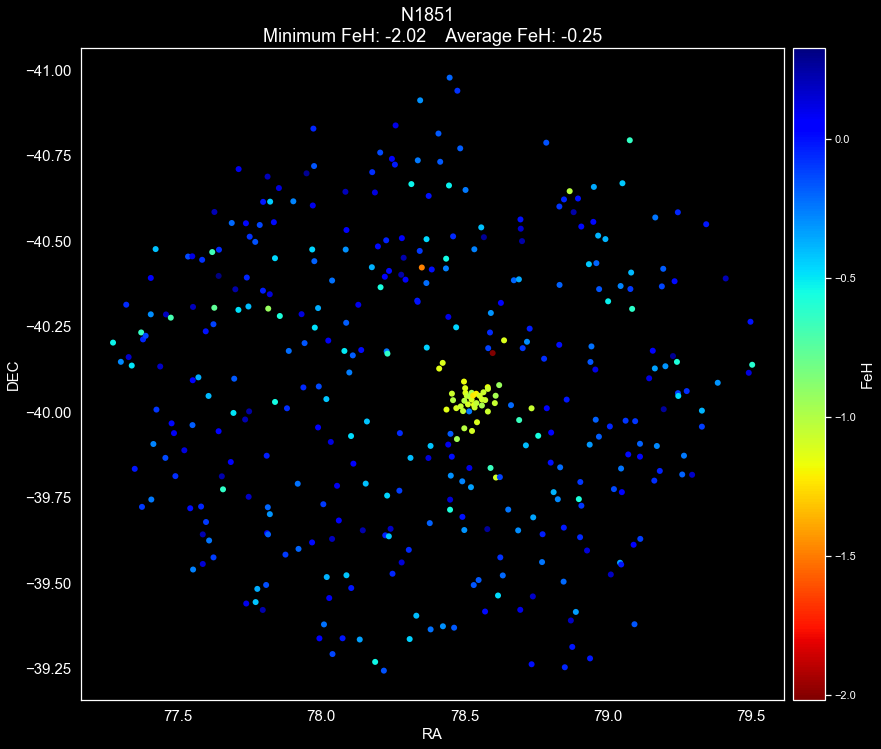


Plot 015 ####################### FeH Heatmap 


N2808

ProgramName: ['cluster_gc1']

main_sequence: 65
turnoff: 31
subgiants: 14
red_giants: 272
red_clump: 60
red_giants - red_clump: 212
dwarfs: 104

BA: 4
Fd: 34
GKd: 64
GKg: 257
Md: 5
Mg: 15


Plot 001 ####################### HR Diagram 



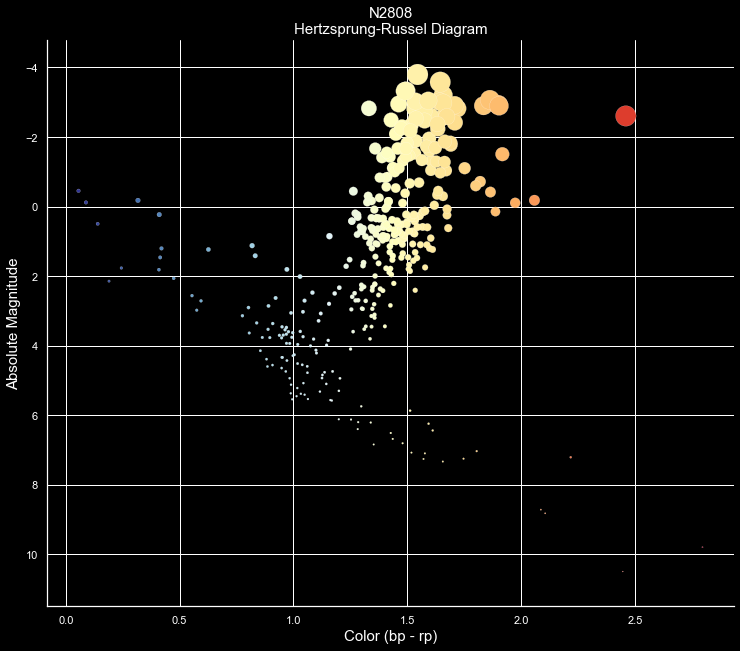


Plot 002 ####################### HR Diagram Mapping BP-RP 



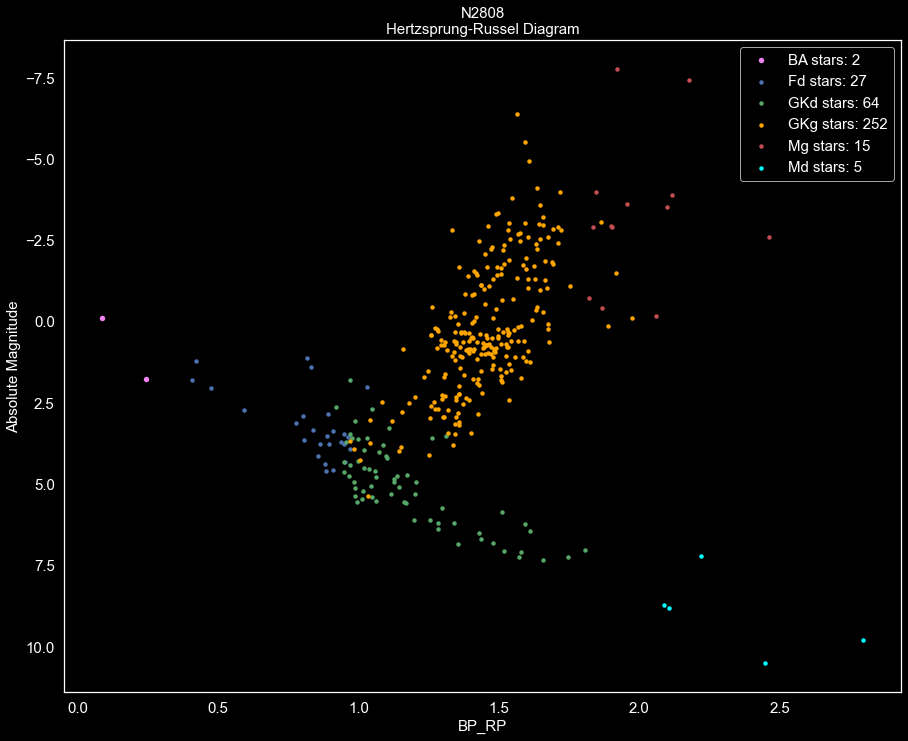


Plot 003 ####################### HR Diagram Mapping BP-RP 



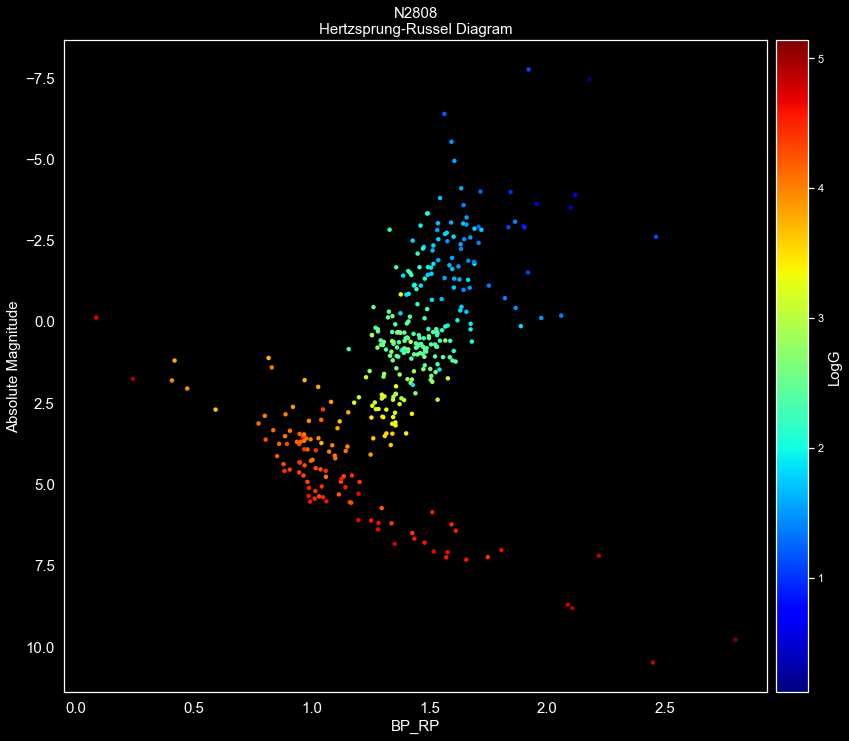


Plot 004 ####################### HR Diagram Mapping Star Class 


Plot 005 ####################### HR Diagram Mapping Star Class 



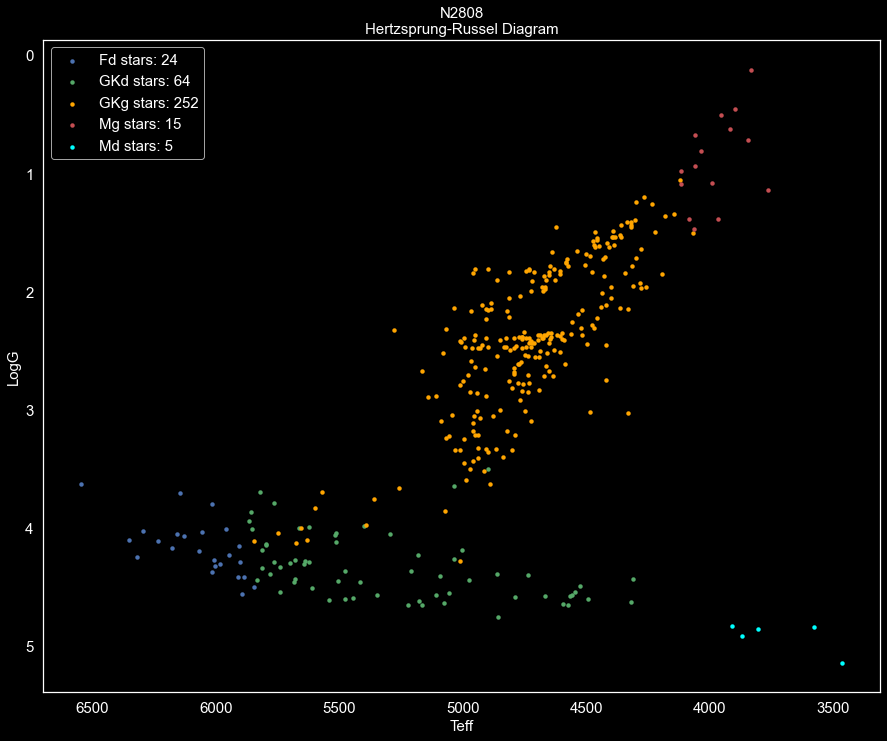


Plot 006 ####################### HR Diagram Mapping Metal Content 



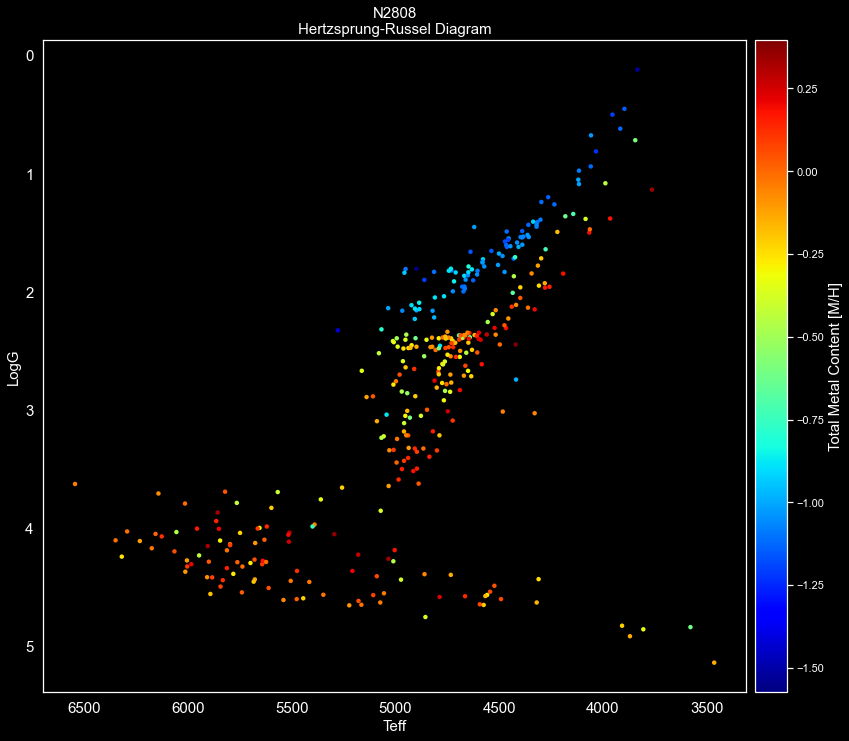


Plot 007 ####################### HR Diagram Mapping Alpha-Element Abundance 


Plot 008 ####################### HR Diagram Mapping SFD reddening 


Plot 009 ####################### HR Diagram Mapping BP-RP 


Plot 010 ####################### VHELIO_AVG 



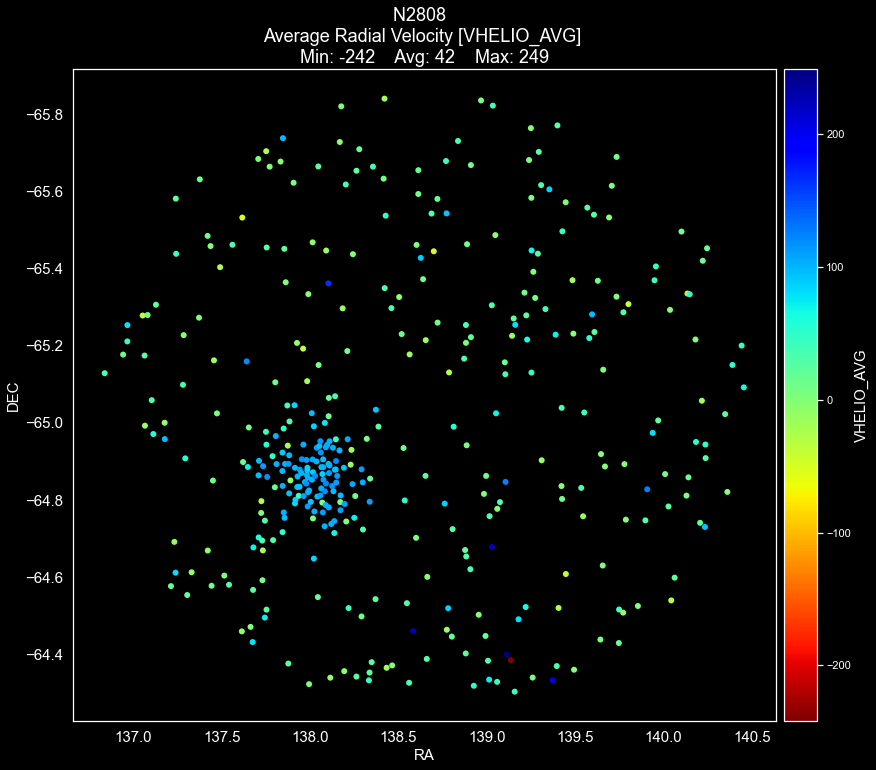


Plot 011 ####################### Gaia Radial Velocity 


Plot 012 ####################### LogG 



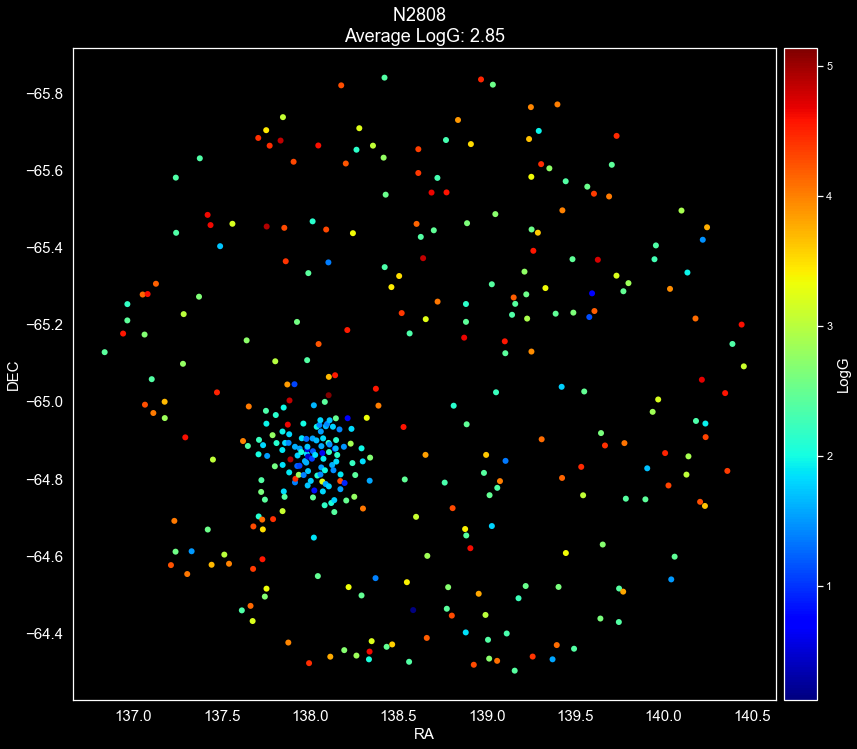


Plot 013 ####################### LogG Heatmap 


Plot 014 ####################### FeH 



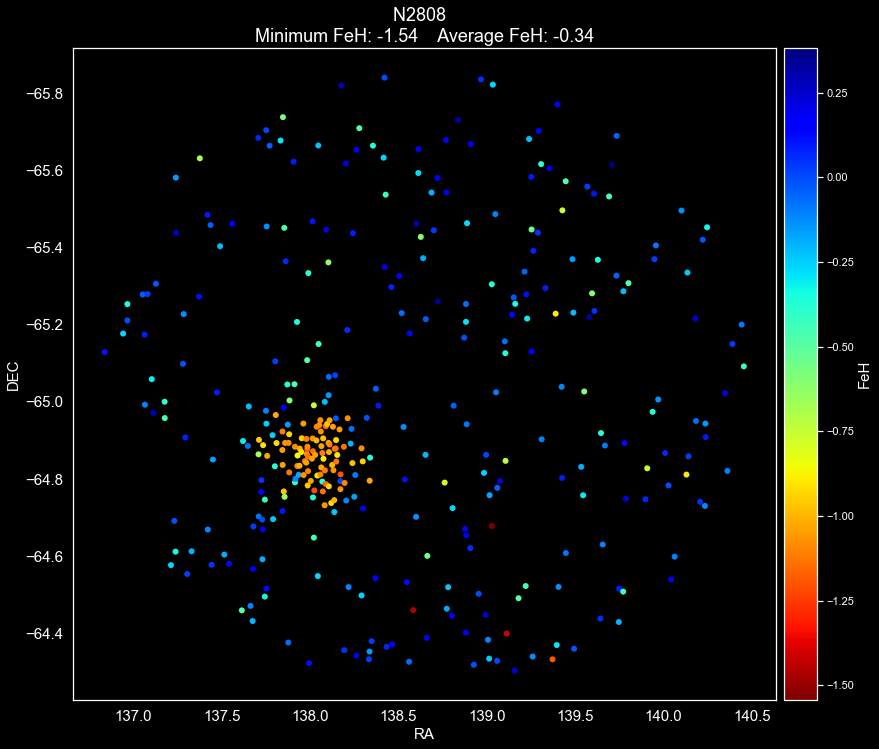


Plot 015 ####################### FeH Heatmap 


N3201

ProgramName: ['cluster_gc1']

main_sequence: 42
turnoff: 7
subgiants: 7
red_giants: 321
red_clump: 76
red_giants - red_clump: 245
dwarfs: 51

BA: 12
Fd: 4
GKd: 36
GKg: 312
Md: 6
Mg: 2


Plot 001 ####################### HR Diagram 



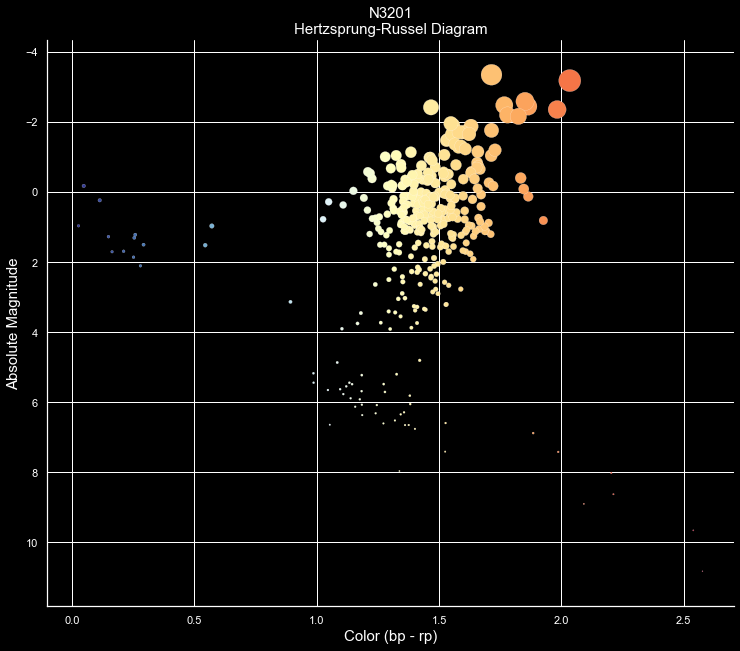


Plot 002 ####################### HR Diagram Mapping BP-RP 



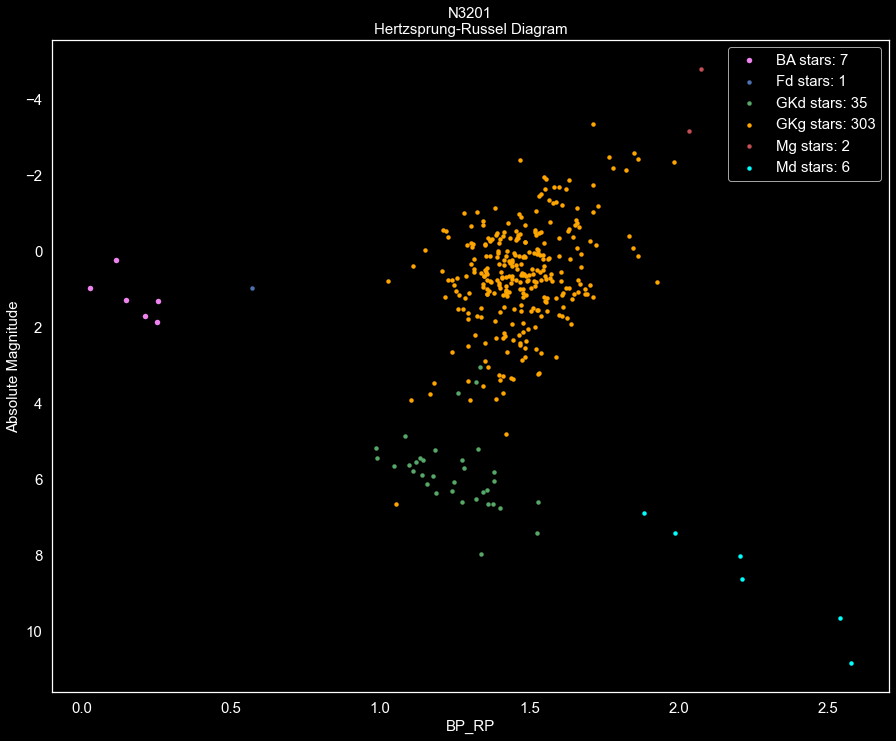


Plot 003 ####################### HR Diagram Mapping BP-RP 



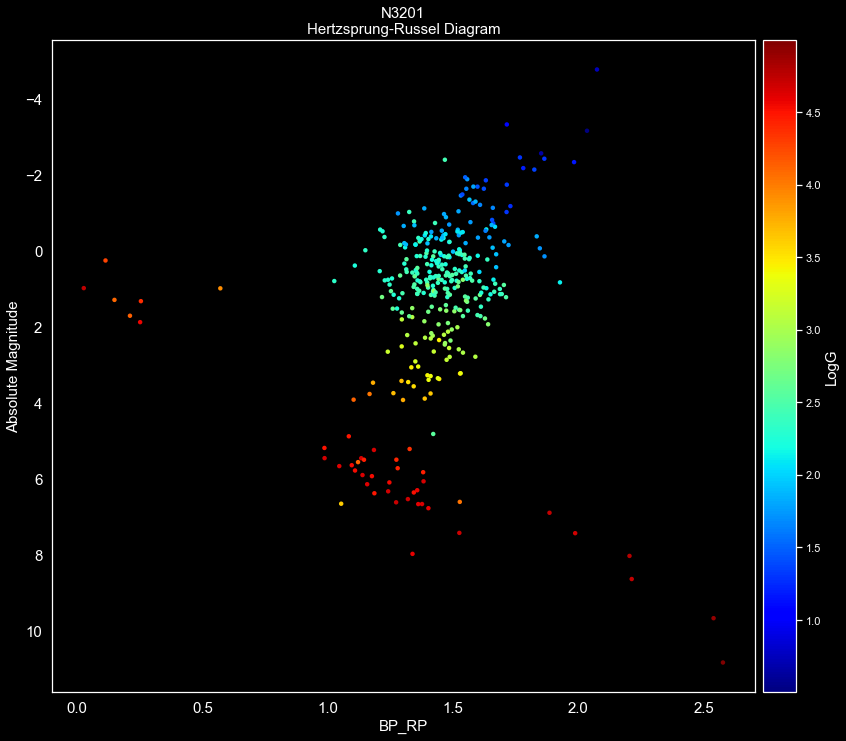


Plot 004 ####################### HR Diagram Mapping Star Class 


Plot 005 ####################### HR Diagram Mapping Star Class 



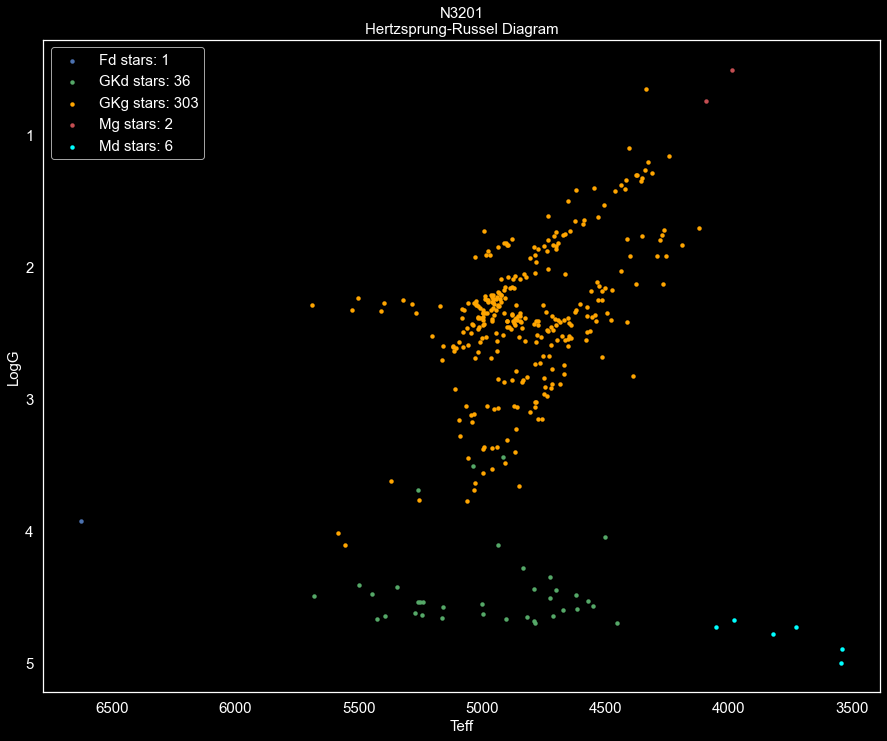


Plot 006 ####################### HR Diagram Mapping Metal Content 



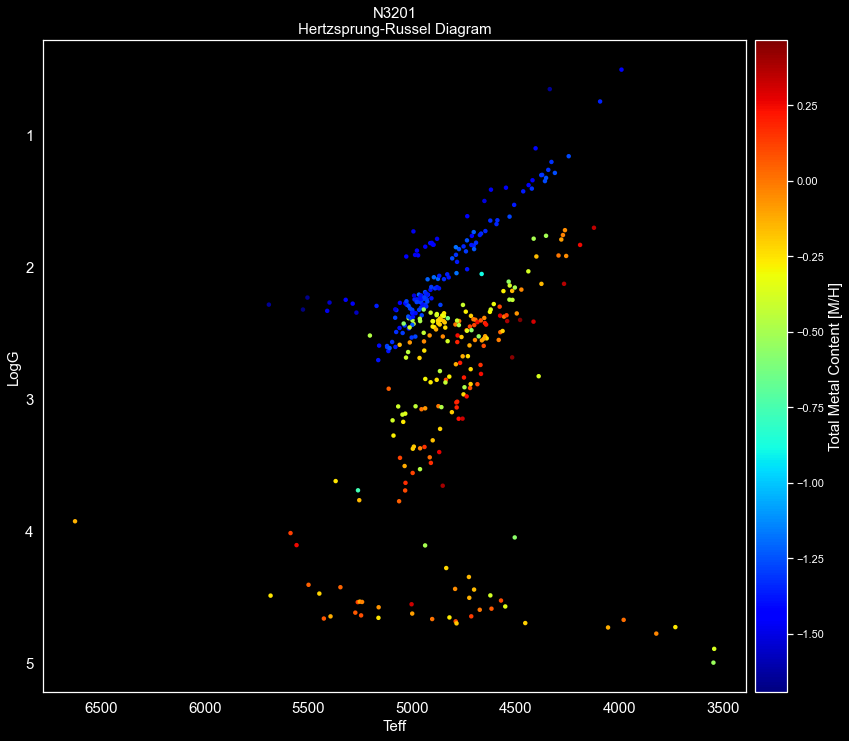


Plot 007 ####################### HR Diagram Mapping Alpha-Element Abundance 


Plot 008 ####################### HR Diagram Mapping SFD reddening 


Plot 009 ####################### HR Diagram Mapping BP-RP 


Plot 010 ####################### VHELIO_AVG 



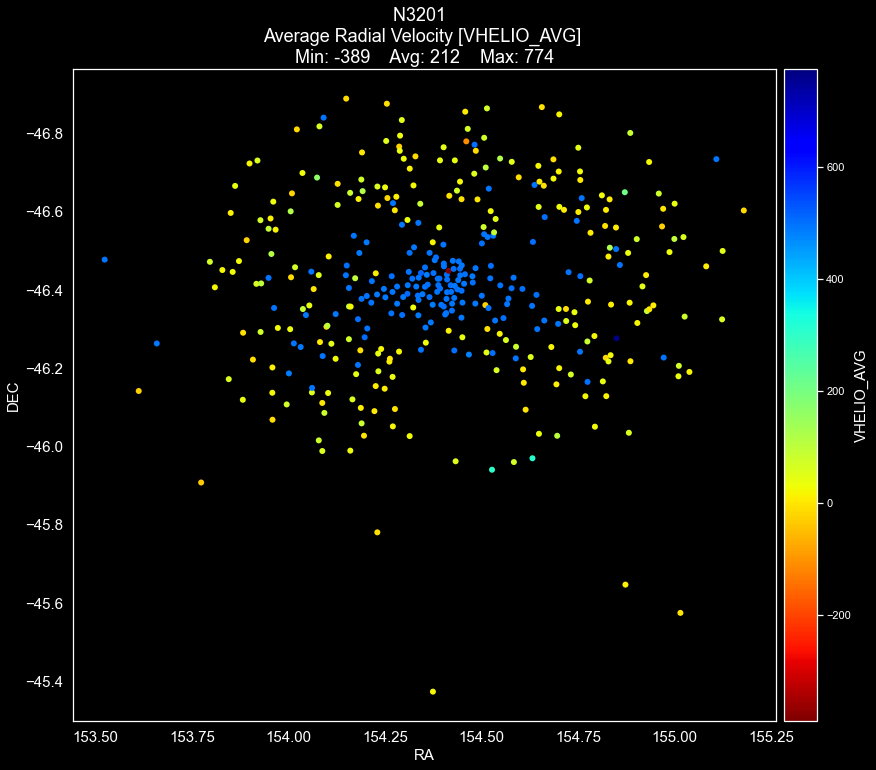


Plot 011 ####################### Gaia Radial Velocity 


Plot 012 ####################### LogG 



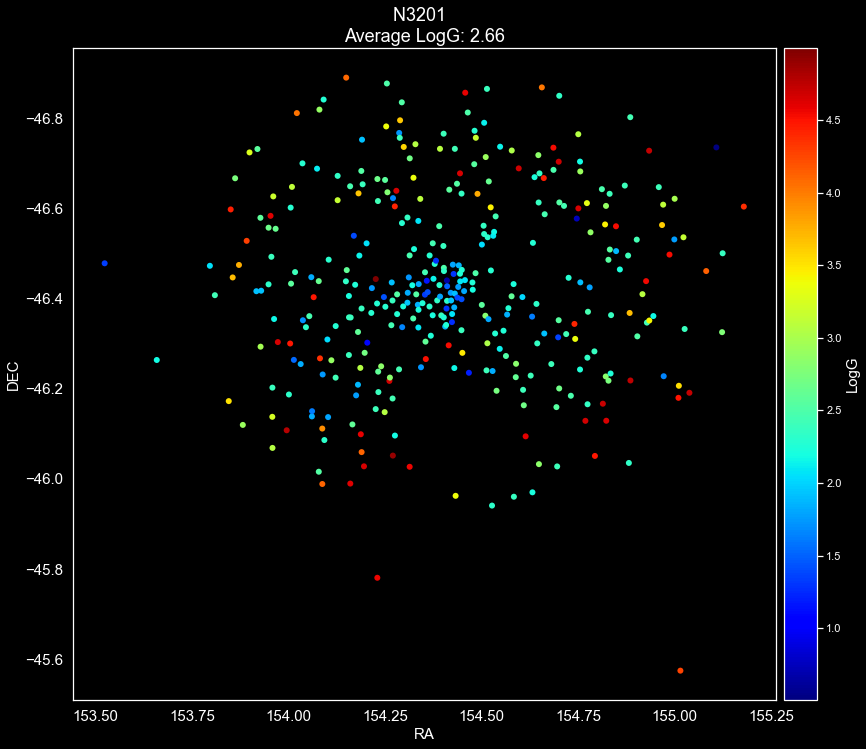


Plot 013 ####################### LogG Heatmap 


Plot 014 ####################### FeH 



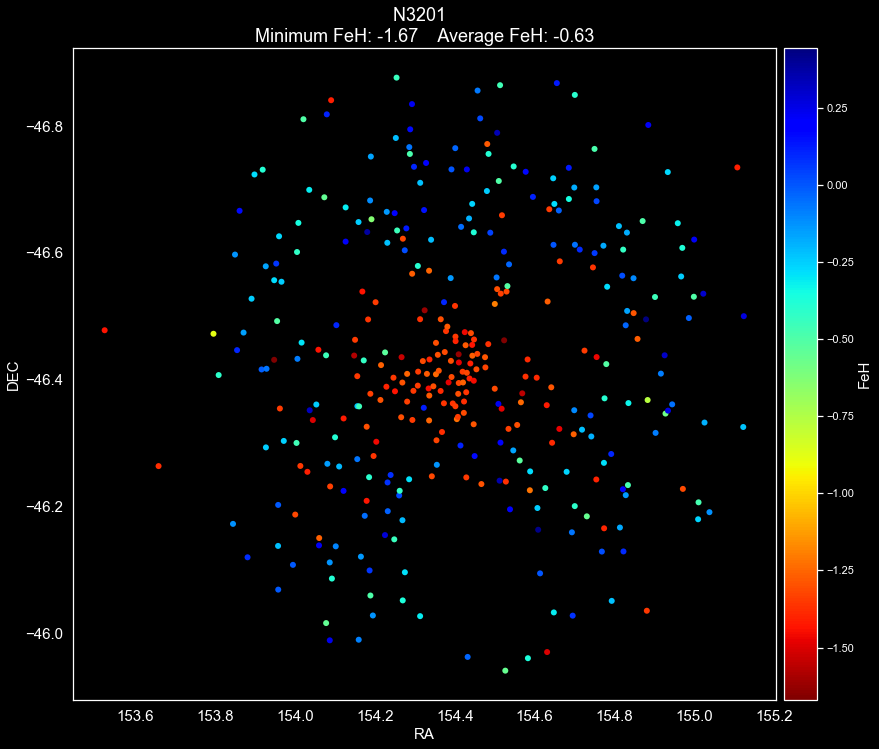


Plot 015 ####################### FeH Heatmap 


Done



In [11]:
# Main secion
# Select which target sample field from above above
# Select which plots to show from above

# Then execute this cell

for field in fields:

    f1 = df_Apogee[df_Apogee['FIELD'] == field]
            
    print('\n' + str(field))
    
    print('\nProgramName: ' + str(sp.unique(f1['PROGRAMNAME'])))
    
    fdwarf = f1[f1['LOGG'].astype(float) > 3.7]
    fmain_sequence = f1[f1['LOGG'].astype(float) > 4.20]
    fturnoff       = f1[(f1['LOGG'].astype(float) < 4.20) & (f1['LOGG'].astype(float) > 3.90)]
    fsubgiants     = f1[(f1['LOGG'].astype(float) < 3.90) & (f1['LOGG'].astype(float) > 3.60)]
    fred_clump     = f1[(f1['LOGG'].astype(float) < 2.55) & (f1['LOGG'].astype(float) > 2.35)]
    fred_giants    = f1[f1['LOGG'].astype(float) < 3.60]

    print("\nmain_sequence: " + str(fmain_sequence.shape[0]))
    print("turnoff: " + str(fturnoff.shape[0]))
    print("subgiants: " + str(fsubgiants.shape[0]))
    print("red_giants: " + str(fred_giants.shape[0]))
    print("red_clump: " + str(fred_clump.shape[0]))
    print("red_giants - red_clump: " + str(fred_giants.shape[0] - fred_clump.shape[0]))
    print("dwarfs: " + str(fdwarf.shape[0]))
    
    BA1f = f1[f1['ASPCAP_CLASS'].isin(['BA'])]
    Fd1f = f1[f1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
    GKd1f = f1[f1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
    GKg1f = f1[f1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
    Md1f = f1[f1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
    Mg1f = f1[f1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]
    
    print("\nBA: " + str(BA1f.shape[0]))
    print("Fd: " + str(Fd1f.shape[0]))
    print("GKd: " + str(GKd1f.shape[0]))
    print("GKg: " + str(GKg1f.shape[0]))
    print("Md: " + str(Md1f.shape[0]))
    print("Mg: " + str(Mg1f.shape[0]) + "\n")
    
    

    print("\nPlot 001 ####################### HR Diagram \n")
    
    #rr1 = f1[f1.R_sun > 0]
    
    r0 = f1[f1.R_sun > 0]
    rr1 = r0[r0.R_sun < 150]

    plt.style.use('dark_background')
    sns.relplot(x='BP_RP', y='M', height=8.5, aspect=1.2, legend=None,
                hue='BP_RP',
                palette='RdYlBu_r',
                size='R_sun',
                sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
                data=rr1
                )
    plt.ylim(rr1['M'].max()+1, rr1['M'].min()-1)
    plt.xlabel('Color (bp - rp)', fontsize=15)
    plt.ylabel('Absolute Magnitude', fontsize=15)
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    if Plot_001_flag == "Y":
        plt.show() 
    else:   
        plt.close() 
    

    print("\nPlot 002 ####################### HR Diagram Mapping BP-RP \n")
    
    s0 = f1[f1['LOGG'] > 0]
    s1 = s0[s0['GAIA_PHOT_G_MEAN_MAG'] > -9999]
    ff1 = s1[(s1['BP_RP'] > -9999) & (s1['BP_RP'] < 9999)]
    BA1 = ff1[ff1['ASPCAP_CLASS'].isin(['BA'])]
    Fd1 = ff1[ff1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
    GKd1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
    GKg1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
    Md1 = ff1[ff1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
    Mg1 = ff1[ff1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    if BA1.shape[0] > 0:
        plt.scatter(BA1['BP_RP'], BA1['M'], label=('BA stars: ' + str(BA1.shape[0])), marker='o', linewidth=0,s=30,c='violet')
    plt.scatter(Fd1['BP_RP'], Fd1['M'], label=('Fd stars: ' + str(Fd1.shape[0])), marker='o', linewidth=0,s=20,c='b')
    plt.scatter(GKd1['BP_RP'], GKd1['M'], label=('GKd stars: ' + str(GKd1.shape[0])), marker='o', linewidth=0,s=20,c='g')
    plt.scatter(GKg1['BP_RP'], GKg1['M'], label=('GKg stars: ' + str(GKg1.shape[0])), marker='o', linewidth=0,s=20,c='orange')
    plt.scatter(Mg1['BP_RP'], Mg1['M'], label=('Mg stars: ' + str(Mg1.shape[0])), marker='o', linewidth=0,s=20,c='r')
    if Md1.shape[0] > 0:
        plt.scatter(Md1['BP_RP'], Md1['M'], label=('Md stars: ' + str(Md1.shape[0])), marker='o', linewidth=0,s=20,c='aqua')
    ax = plt.gca()
    plt.gca().invert_yaxis()
    plt.xlabel('BP_RP', fontsize=15)
    plt.ylabel('Absolute Magnitude', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.legend(fontsize=15)
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    if Plot_002_flag == "Y":
        plt.show() 
    else:   
        plt.close()  

    
    print("\nPlot 003 ####################### HR Diagram Mapping BP-RP \n")
    
    s0 = f1[f1['LOGG'] > 0]
    s1 = s0[s0['GAIA_PHOT_G_MEAN_MAG'] > -9999]
    ff1 = s1[(s1['BP_RP'] > -9999) & (s1['BP_RP'] < 9999)]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    image = plt.scatter(ff1['BP_RP'], ff1['M'], label=s1Label, marker='o', linewidth=0,s=20,
    c=ff1.LOGG,edgecolor='k',cmap="jet")
    ax = plt.gca()
    plt.gca().invert_yaxis()
    plt.xlabel('BP_RP', fontsize=15)
    plt.ylabel('Absolute Magnitude', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    bar = fig.colorbar(image,orientation="vertical",pad=0.01)
    bar.set_label("LogG",size=15)
    if Plot_003_flag == "Y":
        plt.show() 
    else:   
        plt.close() 


    print("\nPlot 004 ####################### HR Diagram Mapping Star Class \n")
    
    s0 = f1[f1['LOGG'] > 0]
    s1 = s0[s0['GAIA_PHOT_G_MEAN_MAG'] > -9999]
    ff1 = s1[(s1['BP_RP'] > -9999) & (s1['BP_RP'] < 9999)]
    BA1 = ff1[ff1['ASPCAP_CLASS'].isin(['BA'])]
    Fd1 = ff1[ff1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
    GKd1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
    GKg1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
    Md1 = ff1[ff1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
    Mg1 = ff1[ff1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    if BA1.shape[0] > 0:
        plt.scatter(BA1['BP_RP'], BA1['GAIA_PHOT_G_MEAN_MAG'], label=('BA stars: ' + str(BA1.shape[0])), marker='o', linewidth=0,s=30,c='violet')
    plt.scatter(Fd1['BP_RP'], Fd1['GAIA_PHOT_G_MEAN_MAG'], label=('Fd stars: ' + str(Fd1.shape[0])), marker='o', linewidth=0,s=20,c='b')
    plt.scatter(GKd1['BP_RP'], GKd1['GAIA_PHOT_G_MEAN_MAG'], label=('GKd stars: ' + str(GKd1.shape[0])), marker='o', linewidth=0,s=20,c='g')
    plt.scatter(GKg1['BP_RP'], GKg1['GAIA_PHOT_G_MEAN_MAG'], label=('GKg stars: ' + str(GKg1.shape[0])), marker='o', linewidth=0,s=20,c='orange')
    plt.scatter(Mg1['BP_RP'], Mg1['GAIA_PHOT_G_MEAN_MAG'], label=('Mg stars: ' + str(Mg1.shape[0])), marker='o', linewidth=0,s=20,c='r')
    if Md1.shape[0] > 0:
        plt.scatter(Md1['BP_RP'], Md1['GAIA_PHOT_G_MEAN_MAG'], label=('Md stars: ' + str(Md1.shape[0])), marker='o', linewidth=0,s=20,c='aqua')
    ax = plt.gca()
    plt.gca().invert_yaxis()
    plt.xlabel('BP_RP', fontsize=15)
    plt.ylabel('GAIA_PHOT_G_MEAN_MAG', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.legend(fontsize=15)
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    if Plot_004_flag == "Y":
        plt.show() 
    else:   
        plt.close() 


    print("\nPlot 005 ####################### HR Diagram Mapping Star Class \n")
    
    s0 = f1[f1['M_H'] > -9999]
    s1 = s0[s0['TEFF'] > -9999]
    ff1 = s1[s1['LOGG'] > -9999]
    BA1 = ff1[ff1['ASPCAP_CLASS'].isin(['BA'])]
    Fd1 = ff1[ff1['ASPCAP_CLASS'].isin(['Fd_a', 'Fd_b', 'Fd_c', 'Fd_d'])]
    GKd1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKd_a', 'GKd_b', 'GKd_c', 'GKd_d'])]
    GKg1 = ff1[ff1['ASPCAP_CLASS'].isin(['GKg_a', 'GKg_b', 'GKg_c', 'GKg_d'])]
    Md1 = ff1[ff1['ASPCAP_CLASS'].isin(['Md_a', 'Md_b', 'Md_c', 'Md_d'])]
    Mg1 = ff1[ff1['ASPCAP_CLASS'].isin(['Mg_a', 'Mg_b', 'Mg_c', 'Mg_d'])]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    if BA1.shape[0] > 0:
        plt.scatter(BA1['TEFF'], BA1['LOGG'], label=('BA stars: ' + str(BA1.shape[0])), marker='o', linewidth=0,s=25,c='b')
    plt.scatter(Fd1['TEFF'], Fd1['LOGG'], label=('Fd stars: ' + str(Fd1.shape[0])), marker='o', linewidth=0,s=20,c='b')
    plt.scatter(GKd1['TEFF'], GKd1['LOGG'], label=('GKd stars: ' + str(GKd1.shape[0])), marker='o', linewidth=0,s=20,c='g')
    plt.scatter(GKg1['TEFF'], GKg1['LOGG'], label=('GKg stars: ' + str(GKg1.shape[0])), marker='o', linewidth=0,s=20,c='orange')
    plt.scatter(Mg1['TEFF'], Mg1['LOGG'], label=('Mg stars: ' + str(Mg1.shape[0])), marker='o', linewidth=0,s=20,c='r')
    if Md1.shape[0] > 0:
        plt.scatter(Md1['TEFF'], Md1['LOGG'], label=('Md stars: ' + str(Md1.shape[0])), marker='o', linewidth=0,s=20,c='aqua')
    ax = plt.gca()
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.xlabel('Teff', fontsize=15)
    plt.ylabel('LogG', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.legend(fontsize=15)
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    if Plot_005_flag == "Y":
        plt.show() 
    else:   
        plt.close() 

       
    print("\nPlot 006 ####################### HR Diagram Mapping Metal Content \n")
    
    s0 = f1[f1['M_H'] > -9999]
    s1 = s0[s0['TEFF'] > -9999]
    ff1 = s1[s1['LOGG'] > -9999]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    image = plt.scatter(ff1['TEFF'], ff1['LOGG'], label=s1Label, marker='o', linewidth=0,s=20,
    c=ff1.M_H,edgecolor='k',cmap="jet")
    ax = plt.gca()
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.xlabel('Teff', fontsize=15)
    plt.ylabel('LogG', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    bar = fig.colorbar(image,orientation="vertical",pad=0.01)
    bar.set_label("Total Metal Content [M/H]",size=15)
    if Plot_006_flag == "Y":
        plt.show() 
    else:   
        plt.close() 


    print("\nPlot 007 ####################### HR Diagram Mapping Alpha-Element Abundance \n")
    
    s0 = f1[f1['ALPHA_M'] > -9999]
    s1 = s0[s0['TEFF'] > -9999]
    ff1 = s1[s1['LOGG'] > -9999]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    image = plt.scatter(ff1['TEFF'], ff1['LOGG'], label=s1Label, marker='o', linewidth=0,s=20,
    c=ff1.ALPHA_M,edgecolor='k',cmap="jet")
    ax = plt.gca()
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.xlabel('Teff', fontsize=15)
    plt.ylabel('LogG', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    bar = fig.colorbar(image,orientation="vertical",pad=0.01)
    bar.set_label("Alpha-Element Abundance [ALPHA_M]",size=15)
    if Plot_007_flag == "Y":
        plt.show() 
    else:   
        plt.close() 


    print("\nPlot 008 ####################### HR Diagram Mapping SFD reddening \n")
    
    s0 = f1[f1['SFD_EBV'] > -9999]
    s1 = s0[s0['TEFF'] > -9999]
    ff1 = s1[s1['LOGG'] > -9999]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    image = plt.scatter(ff1['TEFF'], ff1['LOGG'], label=s1Label, marker='o', linewidth=0,s=20,
    c=ff1.SFD_EBV,edgecolor='k',cmap="jet")
    ax = plt.gca()
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.xlabel('Teff', fontsize=15)
    plt.ylabel('LogG', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    bar = fig.colorbar(image,orientation="vertical",pad=0.01)
    bar.set_label("SFD Reddening [SFD_EBV]",size=15)
    if Plot_008_flag == "Y":
        plt.show() 
    else:   
        plt.close() 


    print("\nPlot 009 ####################### HR Diagram Mapping BP-RP \n")
    
    s0 = f1[f1['BP_RP'] > -9999]
    s1 = s0[s0['TEFF'] > -9999]
    ff1 = s1[(s1['BP_RP'] > -9999) & (s1['BP_RP'] < 9999)]
    s1Label = "TEFF"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    image = plt.scatter(ff1['TEFF'], ff1['LOGG'], label=s1Label, marker='o', linewidth=0,s=20,
    c=ff1.BP_RP,edgecolor='k',cmap="jet")
    ax = plt.gca()
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.xlabel('Teff', fontsize=15)
    plt.ylabel('LogG', fontsize=15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid()
    plt.title(str(field) + '\nHertzsprung-Russel Diagram', fontsize=15)
    bar = fig.colorbar(image,orientation="vertical",pad=0.01)
    bar.set_label("Gaia Color [BP_RP]",size=15)
    if Plot_009_flag == "Y":
        plt.show() 
    else:   
        plt.close() 


    print("\nPlot 010 ####################### VHELIO_AVG \n")

    ff1 = f1[(f1['VHELIO_AVG'] > -9999) & (f1['VHELIO_AVG'] < 9999)]
    s1Label = "VHELIO_AVG"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    if ff1['RA'].min() > 50:
        image = plt.scatter(ff1['RA'], ff1['DEC'], label=s1Label, marker='o', linewidth=0,
        c=ff1.VHELIO_AVG,edgecolor='k',cmap="jet_r")
        ax = plt.gca()
        plt.gca().invert_yaxis()
        plt.xlabel('RA', fontsize=15)
        plt.ylabel('DEC', fontsize=15)
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.grid()
        plt.title(str(field) + 
        "  \nAverage Radial Velocity [VHELIO_AVG] \nMin: " + str(int(ff1.VHELIO_AVG.min())) +
        "    Avg: " + str(int(ff1.VHELIO_AVG.mean())) +
        "    Max: " + str(int(ff1.VHELIO_AVG.max())), fontsize=18)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label("VHELIO_AVG",size=15)
        if Plot_010_flag == "Y":
            plt.show() 
        else:   
            plt.close() 
    else:
        image = plt.scatter(ff1['GLON'], ff1['GLAT'], label=s1Label, marker='o', linewidth=0,
        c=ff1.VHELIO_AVG,edgecolor='k',cmap="jet_r")
        ax = plt.gca()
        plt.gca().invert_yaxis()
        plt.xlabel('GLON', fontsize=15)
        plt.ylabel('GLAT', fontsize=15)
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.grid()
        plt.title(str(field) + 
        "  \nVHELIO_AVG \nMin: " + str(int(ff1.VHELIO_AVG.min())) +
        "    Avg: " + str(int(ff1.VHELIO_AVG.mean())) +
        "    Max: " + str(int(ff1.VHELIO_AVG.max())), fontsize=18)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label("VHELIO_AVG",size=15)
        if Plot_010_flag == "Y":
            plt.show() 
        else:   
            plt.close()


    print("\nPlot 011 ####################### Gaia Radial Velocity \n")
 
    ff1 = f1[f1['GAIA_RADIAL_VELOCITY'] > -9999]
    s1Label = "GAIA_RADIAL_VELOCITY"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    if ff1['RA'].min() > 50:
        image = plt.scatter(ff1['RA'], ff1['DEC'], label=s1Label, marker='o', linewidth=0,
        c=ff1.GAIA_RADIAL_VELOCITY,edgecolor='k',cmap="jet_r")
        ax = plt.gca()
        plt.gca().invert_yaxis()
        plt.xlabel('RA', fontsize=15)
        plt.ylabel('DEC', fontsize=15)
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.grid()
        plt.title(str(field) + 
        "  \nRadial Velocity \nMin: " + str(int(ff1.GAIA_RADIAL_VELOCITY.min())) +
        "    Avg: " + str(int(ff1.GAIA_RADIAL_VELOCITY.mean())) +
        "    Max: " + str(int(ff1.GAIA_RADIAL_VELOCITY.max())), fontsize=18)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label("GAIA_RADIAL_VELOCITY",size=15)
        if Plot_011_flag == "Y":
            plt.show() 
        else:   
            plt.close()
    else:
        image = plt.scatter(ff1['GLON'], ff1['GLAT'], label=s1Label, marker='o', linewidth=0,
        c=ff1.GAIA_RADIAL_VELOCITY,edgecolor='k',cmap="jet_r")
        ax = plt.gca()
        plt.gca().invert_yaxis()
        plt.xlabel('GLON', fontsize=15)
        plt.ylabel('GLAT', fontsize=15)
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.grid()
        plt.title(str(field) + 
        "  \nRadial Velocity \nMin: " + str(int(ff1.GAIA_RADIAL_VELOCITY.min())) +
        "    Avg: " + str(int(ff1.GAIA_RADIAL_VELOCITY.mean())) +
        "    Max: " + str(int(ff1.GAIA_RADIAL_VELOCITY.max())), fontsize=18)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label("GAIA_RADIAL_VELOCITY",size=15)
        if Plot_011_flag == "Y":
            plt.show() 
        else:   
            plt.close()


    print("\nPlot 012 ####################### LogG \n")
    
    ff1 = f1[f1['LOGG'] > -9999]
    s1Label = "LogG"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    if ff1['RA'].min() > 50:
        image = plt.scatter(ff1['RA'], ff1['DEC'], label=s1Label, marker='o', linewidth=0,
        c=ff1.LOGG,edgecolor='k',cmap="jet")
        ax = plt.gca()
        plt.gca().invert_yaxis()
        plt.xlabel('RA', fontsize=15)
        plt.ylabel('DEC', fontsize=15)
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.grid()
        plt.title(str(field) + "  \nAverage LogG: " + str(round(ff1.LOGG.mean(),2)), fontsize=18)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label("LogG",size=15)
        if Plot_012_flag == "Y":
            plt.show() 
        else:   
            plt.close()
    else:
        image = plt.scatter(ff1['GLON'], ff1['GLAT'], label=s1Label, marker='o', linewidth=0,
        c=ff1.LOGG,edgecolor='k',cmap="jet")
        ax = plt.gca()
        plt.gca().invert_yaxis()
        plt.xlabel('GLON', fontsize=15)
        plt.ylabel('GLAT', fontsize=15)
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.grid()
        plt.title(str(field) + "  \nAverage LogG: " + str(round(ff1.LOGG.mean(),2)), fontsize=18)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label("LogG",size=15)
        if Plot_012_flag == "Y":
            plt.show() 
        else:   
            plt.close()
    

    print("\nPlot 013 ####################### LogG Heatmap \n")
    
    rAscap = 'All'
    idx1 = f1['LOGG'] > -9999
    dfs1 = s1[idx1]
    dfs1['LOGG_round'] = round(dfs1['LOGG'], 2)
    if rAscap == 'All':
        dfs3 = dfs1
    else:
        idx2 = dfs1['ASPCAP_CLASS'] == rAscap
        dfs3 = dfs1[idx2]
    
    dfs3 = dfs3.sort_values(by=['LOGG'], ascending=True)
    
    dfs2 = dfs3.drop_duplicates(subset=['APOGEE_ID'], keep='first')
    

    if dfs2.shape[0] > 25:
        if dfs2.shape[0] > 50:
            df_list = dfs2[:50]
        else:
            df_list = dfs2[:25]
        s1_temp = df_list.pivot(index='APOGEE_ID', columns='SpT2', values='LOGG_round') #good
        
        result = s1_temp.fillna(value=0)
        
        # Draw a heatmap with the numeric values in each cell
        f, ax = plt.subplots(figsize=(20, 15))
        
        plt.title(str(field) +  "\n LogG" , fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        
        cmap = sns.cm.rocket_r 
        
        heat_map = sns.heatmap(result, annot=True, fmt="g", cmap='jet', linewidths=.5, ax=ax,
                    cbar_kws={'label': 'LogG'})
        heat_map.figure.axes[-1].yaxis.label.set_size(18)
        if Plot_013_flag == "Y":
            plt.show() 
        else:   
            plt.close()
    

    print("\nPlot 014 ####################### FeH \n")
 
    ff1 = f1[f1['FE_H'] > -9999]
    s1Label = "FE_H"
    fig = plt.figure(figsize=(15, 12))
    plt.subplot(111)
    if ff1['RA'].min() > 50:
        image = plt.scatter(ff1['RA'], ff1['DEC'], label=s1Label, marker='o', linewidth=0,
                    c=ff1.FE_H,edgecolor='k',cmap="jet_r")
        ax = plt.gca()
        plt.gca().invert_yaxis()
        plt.xlabel('RA', fontsize=15)
        plt.ylabel('DEC', fontsize=15)
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.grid()
        plt.title(str(field) + 
        "  \nMinimum FeH: " + str(round(ff1.FE_H.min(),2)) +
        "    Average FeH: " + str(round(ff1.FE_H.mean(),2)), fontsize=18)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label('FeH',size=15)
        if Plot_014_flag == "Y":
            plt.show() 
        else:   
            plt.close()
    else:
        image = plt.scatter(ff1['GLON'], ff1['GLAT'], label=s1Label, marker='o', linewidth=0,
                    c=ff1.FE_H,edgecolor='k',cmap="jet_r")
        ax = plt.gca()
        plt.gca().invert_yaxis()
        plt.xlabel('GLON', fontsize=15)
        plt.ylabel('GLAT', fontsize=15)
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.grid()
        plt.title(str(field) + 
        "  \nMinimum FeH: " + str(round(ff1.FE_H.min(),2)) +
        "    Average FeH: " + str(round(ff1.FE_H.mean(),2)), fontsize=18)
        bar = fig.colorbar(image,orientation="vertical",pad=0.01)
        bar.set_label('FeH',size=15)
        if Plot_014_flag == "Y":
            plt.show() 
        else:   
            plt.close()
            plt.close()


    print("\nPlot 015 ####################### FeH Heatmap \n")
    
    rAscap == 'All'
    idx1 = f1['FE_H'] > -9999
    dfs1 = f1[idx1]
    dfs1['FE_H_round'] = round(dfs1['FE_H'], 2)
    if rAscap == 'All':
        dfs3 = dfs1
    else:
        idx2 = dfs1['ASPCAP_CLASS'] == rAscap
        dfs3 = dfs1[idx2]
    
    dfs3 = dfs3.sort_values(by=['FE_H'], ascending=True)
    
    dfs2 = dfs3.drop_duplicates(subset=['APOGEE_ID'], keep='first')
    
    if dfs2.shape[0] > 25:
        if dfs2.shape[0] > 50:
            df_list = dfs2[:50]
        else:
            df_list = dfs2[:25]
        df_list = df_list.sort_values(by=['APOGEE_ID'], ascending=True)
        s1_temp = df_list.pivot(index='APOGEE_ID', columns='SpT2', values='FE_H_round')
        result = s1_temp.fillna(value=0)
        sns.set()
        # Draw a heatmap with the numeric values in each cell
        f, ax = plt.subplots(figsize=(20, 15))
        plt.title(str(field) +  "\n FE_H", fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        
        cmap = sns.cm.rocket_r #jet_r
        
        heat_map = sns.heatmap(result, annot=True, fmt="g", cmap='jet_r', linewidths=.5, ax=ax,
                    cbar_kws={'label': 'FeH'})
        heat_map.figure.axes[-1].yaxis.label.set_size(18)
        if Plot_015_flag == "Y":
            plt.show() 
        else:   
            plt.close()


print("\nDone\n")
